# Курсовой проект по курсу "Python для DataScience часть 2"

## Импорт библиотек

In [839]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [840]:
test_path = 'course_project_test.csv'
train_path = 'course_project_train.csv'

## Построение модели классификации

### 1. Обзор обучающего датасета

In [841]:
df_train = pd.read_csv(train_path)
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [842]:
df_train.shape

(7500, 17)

Видим, что имеется 7500 наблюдений и 17 признаков, из них один признак - Credit Default - целевой.

In [843]:
df_train.iloc[0]

Home Ownership                            Own Home
Annual Income                               482087
Years in current job                           NaN
Tax Liens                                        0
Number of Open Accounts                         11
Years of Credit History                       26.3
Maximum Open Credit                         685960
Number of Credit Problems                        1
Months since last delinquent                   NaN
Bankruptcies                                     1
Purpose                         debt consolidation
Term                                    Short Term
Current Loan Amount                          1e+08
Current Credit Balance                       47386
Monthly Debt                                  7914
Credit Score                                   749
Credit Default                                   0
Name: 0, dtype: object

Описание датасета:

    Home Ownership - домовладение,
    Annual Income - годовой доход,
    Years in current job - количество лет на текущем месте работы,
    Tax Liens - налоговые обременения,
    Number of Open Accounts - количество открытых счетов,
    Years of Credit History - количество лет кредитной истории,
    Maximum Open Credit - наибольший открытый кредит,
    Number of Credit Problems - количество проблем с кредитом,
    Months since last delinquent - количество месяцев с последней просрочки платежа,
    Bankruptcies - банкротства,
    Purpose - цель кредита,
    Term - срок кредита,
    Current Loan Amount - текущая сумма кредита,
    Current Credit Balance - текущий кредитный баланс,
    Monthly Debt - ежемесячный долг,
    Credit Default - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [844]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
Home Ownership                  7500 non-null object
Annual Income                   5943 non-null float64
Years in current job            7129 non-null object
Tax Liens                       7500 non-null float64
Number of Open Accounts         7500 non-null float64
Years of Credit History         7500 non-null float64
Maximum Open Credit             7500 non-null float64
Number of Credit Problems       7500 non-null float64
Months since last delinquent    3419 non-null float64
Bankruptcies                    7486 non-null float64
Purpose                         7500 non-null object
Term                            7500 non-null object
Current Loan Amount             7500 non-null float64
Current Credit Balance          7500 non-null float64
Monthly Debt                    7500 non-null float64
Credit Score                    5943 non-null float64
Credit Default                  7

Видим (там, где менее 7500), что есть пропуски. Это касается 'Annual Income', т.е. не у всех известен годовой доход. Что касается поля 'Month since last delinquent', то пропуски (NaN) можно заменить большим числом (фактически не было правонарушений). Таким числом может быть практически бесконечный срок кредита - 50 лет (600 месяцев).

In [845]:
df_train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


В целом, каких-то заоблачных значений нет, за исключением, возможно, суммы наибольшего открытого кредита кредита около 1300 млн. руб или текущей суммы кредита около 100 млн. руб. Из таблицы видно, что среднее значение 'Current Default' равно 0.28, что говорит о несбалансированности выборки (в данной выборке "дефолтников" около 28%).

### 2. Обработка выбросов

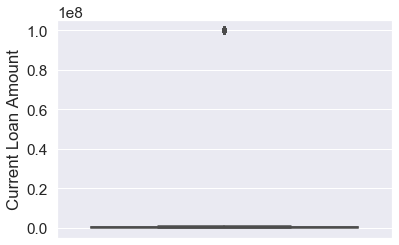

In [846]:
col_name = 'Current Loan Amount'
ax = sns.boxplot(y = df_train[col_name])

Путем перебора выясняем, что подозрительным является значение "все девятки"

In [847]:
val = 99999999
sum(df_train[col_name] == val)

870

Посмотрим на статистику данных в этом подозрительном разрезе

In [848]:
df_train[df_train[col_name] == val][set(df_train.columns) - {col_name}].describe()

,Number of Open Accounts,Credit Score,Current Credit Balance,Monthly Debt,Bankruptcies,Credit Default,Months since last delinquent,Maximum Open Credit,Number of Credit Problems,Years of Credit History,Annual Income,Tax Liens
count,870.000000,870.000000,8.700000e+02,870.000000,867.000000,870.0,371.000000,8.700000e+02,870.000000,870.000000,8.700000e+02,870.000000
mean,11.134483,730.225287,3.028599e+05,17933.028736,0.111880,0.0,34.730458,8.373678e+05,0.158621,18.509080,1.427779e+06,0.024138
std,4.803056,21.395230,3.590877e+05,12264.380264,0.336652,0.0,21.185732,2.096922e+06,0.465261,7.024222,8.998839e+05,0.259443
min,2.000000,601.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000,4.800000,2.167140e+05,0.000000
25%,8.000000,726.000000,1.145225e+05,9484.750000,0.000000,0.0,18.000000,3.001625e+05,0.000000,13.725000,8.668560e+05,0.000000
50%,10.000000,737.000000,2.134650e+05,15445.500000,0.000000,0.0,32.000000,5.155040e+05,0.000000,17.200000,1.245507e+06,0.000000
75%,14.000000,744.000000,3.633702e+05,23421.250000,0.000000,0.0,50.000000,8.601725e+05,0.000000,22.350000,1.726886e+06,0.000000
max,34.000000,751.000000,4.249673e+06,94674.000000,3.000000,0.0,81.000000,4.092389e+07,6.000000,50.900000,8.758449e+06,6.000000


Видим, что это "недефолтники" (max и min 'Credit Default' равны 0), а так как недефолтников в выборке больше, то удаление части их не так страшно (тех, у которых подозрительное значение 'Current Loan Amount' 99999999).

Проверим признак 'Maximum Open Credit'

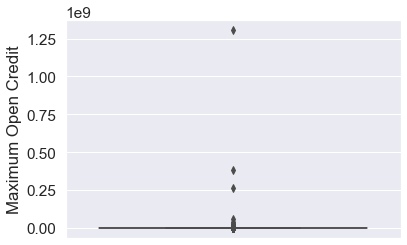

In [849]:
col_name = 'Maximum Open Credit'
ax = sns.boxplot(y = df_train[col_name])

In [850]:
val = 1304726170
sum(df_train[col_name] == val)

1

In [851]:
df_train[df_train[col_name] == val][set(df_train.columns) - {col_name}]

,Number of Open Accounts,Credit Score,Term,Current Credit Balance,Monthly Debt,Current Loan Amount,Bankruptcies,Purpose,Credit Default,Home Ownership,Months since last delinquent,Number of Credit Problems,Years of Credit History,Years in current job,Annual Income,Tax Liens
617,13.0,NaN,Short Term,1126814.0,5492.0,529892.0,0.0,debt consolidation,0,Home Mortgage,NaN,0.0,27.5,3 years,NaN,0.0


Ничего особенного, но так как такое значение одно, то принимаем это за выброс и удаляем.

In [852]:
df_train = df_train.drop(df_train[df_train[col_name] == val].index)

In [853]:
val = 380052288
sum(df_train[col_name] == val)

1

In [854]:
df_train[df_train[col_name] == val][set(df_train.columns) - {col_name}]

,Number of Open Accounts,Credit Score,Term,Current Credit Balance,Monthly Debt,Current Loan Amount,Bankruptcies,Purpose,Credit Default,Home Ownership,Months since last delinquent,Number of Credit Problems,Years of Credit History,Years in current job,Annual Income,Tax Liens
44,17.0,729.0,Short Term,656450.0,34357.0,33110.0,0.0,take a trip,0,Have Mortgage,35.0,1.0,15.4,10+ years,1334256.0,0.0


Ничего особенного. Опять удаляем выброс.

In [855]:
df_train = df_train.drop(df_train[df_train[col_name] == val].index)

In [856]:
val = 265512874
sum(df_train[col_name] == val)

1

In [857]:
df_train[df_train[col_name] == val][set(df_train.columns) - {col_name}]

,Number of Open Accounts,Credit Score,Term,Current Credit Balance,Monthly Debt,Current Loan Amount,Bankruptcies,Purpose,Credit Default,Home Ownership,Months since last delinquent,Number of Credit Problems,Years of Credit History,Years in current job,Annual Income,Tax Liens
2617,12.0,750.0,Short Term,1834450.0,20272.0,50116.0,0.0,other,0,Home Mortgage,NaN,0.0,35.5,10+ years,3217802.0,0.0


Ничего особенного.
Итого: удаляем наблюдения, у которых признак 'Current Loan Amount' равен 99999999.

In [858]:
df_train = df_train.drop(df_train[df_train[col_name] == val].index)

In [859]:
col_name = 'Current Loan Amount'
val = 99999999
df_train = df_train.drop(df_train[df_train[col_name] == val].index)

In [860]:
df_train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.071000e+03,6627.000000,6627.000000,6627.000000,6.627000e+03,6627.000000,3047.000000,6616.000000,6627.000000,6.627000e+03,6627.000000,5071.000000,6627.000000
mean,1.355501e+06,0.030934,11.129169,18.288773,6.654371e+05,0.171420,34.687890,0.117896,309071.765505,2.877084e+05,18363.746793,1223.454545,0.318847
std,8.350231e+05,0.273229,4.923524,7.041834,1.107517e+06,0.502824,21.756216,0.348638,182255.811109,3.113375e+05,11881.779310,1726.626749,0.466065
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,11242.000000,0.000000e+00,0.000000,585.000000,0.000000
25%,8.396005e+05,0.000000,8.000000,13.500000,2.764850e+05,0.000000,16.000000,0.000000,172821.000000,1.141615e+05,10153.500000,709.000000,0.000000
50%,1.162344e+06,0.000000,10.000000,17.000000,4.734840e+05,0.000000,32.000000,0.000000,265826.000000,2.089430e+05,16202.000000,730.000000,0.000000
75%,1.627492e+06,0.000000,14.000000,21.800000,7.841240e+05,0.000000,50.000000,0.000000,430100.000000,3.587960e+05,23880.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,5.756256e+07,7.000000,118.000000,4.000000,789030.000000,6.506797e+06,136679.000000,7510.000000,1.000000


Видим, что баланс выборки несколько улучшился (32% дефолтников), но ценой удаления 870 наблюдений (12%).

### 3. Обработка пропусков

Как уже говорилось ранее, заменим NaN в признаке 'Months since last delinquent' на 600 месяцев.

In [861]:
col_name = 'Months since last delinquent'
val = 600
df_train[col_name].fillna(val, inplace = True)

In [862]:
df_train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.071000e+03,6627.000000,6627.000000,6627.000000,6.627000e+03,6627.000000,6627.000000,6616.000000,6627.000000,6.627000e+03,6627.000000,5071.000000,6627.000000
mean,1.355501e+06,0.030934,11.129169,18.288773,6.654371e+05,0.171420,340.077561,0.117896,309071.765505,2.877084e+05,18363.746793,1223.454545,0.318847
std,8.350231e+05,0.273229,4.923524,7.041834,1.107517e+06,0.502824,282.147481,0.348638,182255.811109,3.113375e+05,11881.779310,1726.626749,0.466065
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,11242.000000,0.000000e+00,0.000000,585.000000,0.000000
25%,8.396005e+05,0.000000,8.000000,13.500000,2.764850e+05,0.000000,35.000000,0.000000,172821.000000,1.141615e+05,10153.500000,709.000000,0.000000
50%,1.162344e+06,0.000000,10.000000,17.000000,4.734840e+05,0.000000,600.000000,0.000000,265826.000000,2.089430e+05,16202.000000,730.000000,0.000000
75%,1.627492e+06,0.000000,14.000000,21.800000,7.841240e+05,0.000000,600.000000,0.000000,430100.000000,3.587960e+05,23880.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,5.756256e+07,7.000000,600.000000,4.000000,789030.000000,6.506797e+06,136679.000000,7510.000000,1.000000


NaN в признаке 'Annual Income' заменим условной медианой (условной, т.е. зависящей от 'Credit Default').

In [863]:
print(df_train[df_train['Credit Default'] == 0]['Annual Income'].median())
print(df_train[df_train['Credit Default'] == 1]['Annual Income'].median())

1221415.0
1055915.5


In [864]:
col_name = 'Annual Income'
val_0 = df_train[df_train['Credit Default'] == 0][col_name].median()
val_1 = df_train[df_train['Credit Default'] == 0][col_name].median()
df_train.loc[df_train['Credit Default'] == 0, col_name] = df_train.loc[df_train['Credit Default'] == 0, col_name].fillna(val_0)
df_train.loc[df_train['Credit Default'] == 1, col_name] = df_train.loc[df_train['Credit Default'] == 1, col_name].fillna(val_1)

In [865]:
df_train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,6.627000e+03,6627.000000,6627.000000,6627.000000,6.627000e+03,6627.000000,6627.000000,6616.000000,6627.000000,6.627000e+03,6627.000000,5071.000000,6627.000000
mean,1.324018e+06,0.030934,11.129169,18.288773,6.654371e+05,0.171420,340.077561,0.117896,309071.765505,2.877084e+05,18363.746793,1223.454545,0.318847
std,7.326351e+05,0.273229,4.923524,7.041834,1.107517e+06,0.502824,282.147481,0.348638,182255.811109,3.113375e+05,11881.779310,1726.626749,0.466065
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,11242.000000,0.000000e+00,0.000000,585.000000,0.000000
25%,9.370610e+05,0.000000,8.000000,13.500000,2.764850e+05,0.000000,35.000000,0.000000,172821.000000,1.141615e+05,10153.500000,709.000000,0.000000
50%,1.221415e+06,0.000000,10.000000,17.000000,4.734840e+05,0.000000,600.000000,0.000000,265826.000000,2.089430e+05,16202.000000,730.000000,0.000000
75%,1.458488e+06,0.000000,14.000000,21.800000,7.841240e+05,0.000000,600.000000,0.000000,430100.000000,3.587960e+05,23880.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,5.756256e+07,7.000000,600.000000,4.000000,789030.000000,6.506797e+06,136679.000000,7510.000000,1.000000


Видим, что не обработан признак 'Bankruptcies'.

In [866]:
col_name = 'Bankruptcies'
df_train[pd.isnull(df_train[col_name])][set(df_train.columns) - set(col_name)].head()

,Credit Score,Months since last delinquent,Number of Open Accounts,Tax Liens,Term,Current Credit Balance,Monthly Debt,Annual Income,Maximum Open Credit,Current Loan Amount,Bankruptcies,Number of Credit Problems,Purpose,Years of Credit History,Years in current job,Credit Default,Home Ownership
257,NaN,0.0,15.0,0.0,Short Term,524210.0,19613.0,1221415.0,1556390.0,447480.0,NaN,0.0,debt consolidation,13.6,2 years,0,Home Mortgage
898,732.0,0.0,20.0,0.0,Short Term,607487.0,9669.0,739005.0,2177758.0,456808.0,NaN,0.0,debt consolidation,18.3,2 years,1,Rent
1404,747.0,0.0,4.0,0.0,Short Term,0.0,1243.0,349391.0,0.0,11242.0,NaN,0.0,other,12.7,< 1 year,0,Rent
3063,7490.0,0.0,5.0,0.0,Short Term,18373.0,929.0,464474.0,38126.0,44814.0,NaN,0.0,other,14.9,10+ years,1,Rent
3252,750.0,0.0,7.0,0.0,Short Term,52250.0,1145.0,832770.0,636856.0,156970.0,NaN,0.0,business loan,16.5,< 1 year,0,Rent


Удаляем эти наблюдения.

In [867]:
df_train.dropna(subset = [col_name], inplace = True)

In [868]:
df_train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,6.616000e+03,6616.000000,6616.000000,6616.000000,6.616000e+03,6616.000000,6616.000000,6616.000000,6616.000000,6.616000e+03,6616.000000,5062.000000,6616.000000
mean,1.324921e+06,0.030985,11.130744,18.291868,6.655611e+05,0.171705,340.629081,0.117896,309247.848247,2.878586e+05,18381.891173,1220.476096,0.318773
std,7.325376e+05,0.273453,4.922712,7.045092,1.108088e+06,0.503194,282.055946,0.348638,182211.088327,3.114163e+05,11879.133930,1721.856262,0.466036
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,21472.000000,0.000000e+00,0.000000,585.000000,0.000000
25%,9.381012e+05,0.000000,8.000000,13.500000,2.765565e+05,0.000000,35.000000,0.000000,173052.000000,1.143088e+05,10177.500000,709.000000,0.000000
50%,1.221415e+06,0.000000,10.000000,17.000000,4.734730e+05,0.000000,600.000000,0.000000,265870.000000,2.091900e+05,16223.000000,730.000000,0.000000
75%,1.458886e+06,0.000000,14.000000,21.800000,7.840030e+05,0.000000,600.000000,0.000000,430100.000000,3.587770e+05,23886.500000,742.750000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,5.756256e+07,7.000000,600.000000,4.000000,789030.000000,6.506797e+06,136679.000000,7510.000000,1.000000


Остался признак 'Credit Score'. Посмотрим на его значимость (корреляцию с другими, в т.ч с целевой переменной)

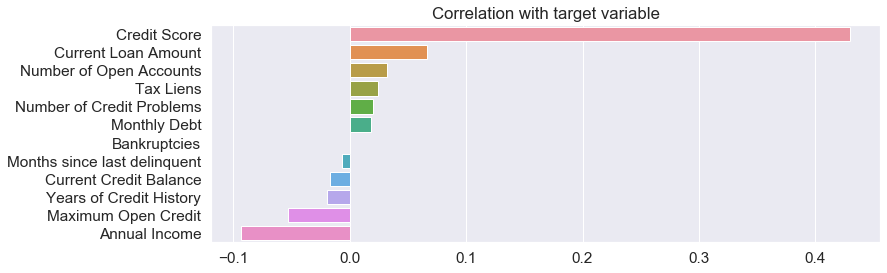

In [869]:
corr_with_target = df_train.corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(12, 4))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

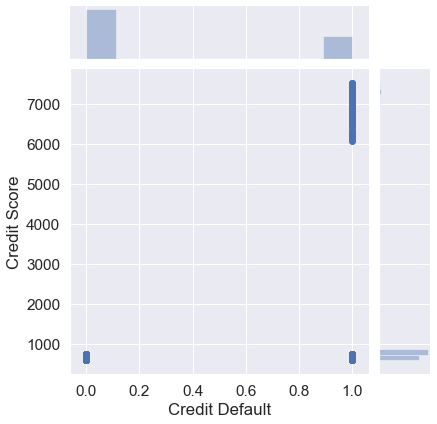

In [870]:
col_name = 'Credit Default'
with_name = 'Credit Score'
df_tmp = df_train.copy()
df_tmp.dropna(subset = [with_name], inplace = True)
limit_bal_with_target_s = df_tmp[[with_name, col_name]]

sns.jointplot(x = col_name, y = with_name, data = limit_bal_with_target_s)
plt.show()

Видим, что 'Credit Score' в данном случае разделен на две области; но, к счастью, оказалось достаточным большие значения разделить на 10, получив восстановленные значения.

In [871]:
col_name = 'Credit Score'
threshold = 5000
df_train.loc[df_train[col_name] > threshold, col_name] = df_train[df_train[col_name] > threshold][col_name] * 0.1

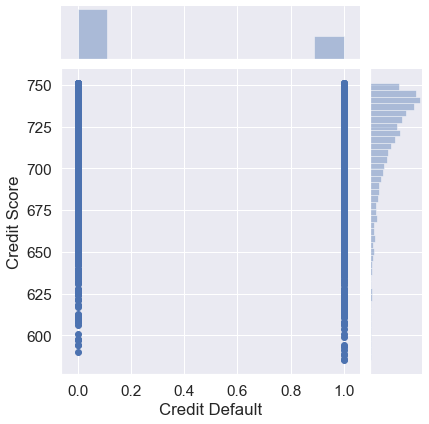

In [872]:
col_name = 'Credit Default'
with_name = 'Credit Score'
df_tmp = df_train.copy()
df_tmp.dropna(subset = [with_name], inplace = True)
limit_bal_with_target_s = df_tmp[[with_name, col_name]]

sns.jointplot(x = col_name, y = with_name, data = limit_bal_with_target_s)
plt.show()

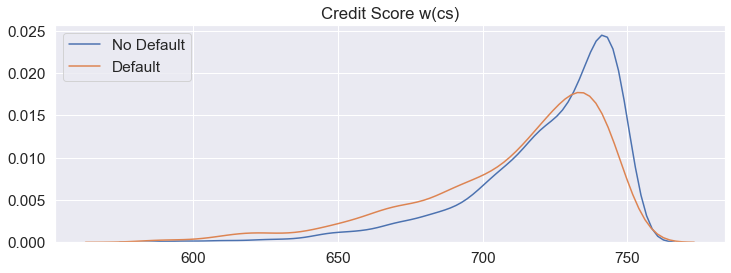

In [873]:
col_name = 'Credit Score'
plt.figure(figsize=(12, 4))
sns.kdeplot(df_tmp.loc[(df_tmp['Credit Default'] == 0), col_name], label = 'No Default')
sns.kdeplot(df_tmp.loc[(df_tmp['Credit Default'] == 1), col_name], label = 'Default')

plt.title('Credit Score w(cs)')
plt.show()

In [874]:
col_name = 'Credit Score'
val_0 = df_train[df_train['Credit Default'] == 0][col_name].median()
val_1 = df_train[df_train['Credit Default'] == 0][col_name].median()
df_train.loc[df_train['Credit Default'] == 0, col_name] = df_train.loc[df_train['Credit Default'] == 0, col_name].fillna(val_0)
df_train.loc[df_train['Credit Default'] == 1, col_name] = df_train.loc[df_train['Credit Default'] == 1, col_name].fillna(val_1)

In [875]:
print(val_0)
print(val_1)

730.0
730.0


In [876]:
df_train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,6.616000e+03,6616.000000,6616.000000,6616.000000,6.616000e+03,6616.000000,6616.000000,6616.000000,6616.000000,6.616000e+03,6616.000000,6616.000000,6616.000000
mean,1.324921e+06,0.030985,11.130744,18.291868,6.655611e+05,0.171705,340.629081,0.117896,309247.848247,2.878586e+05,18381.891173,721.066052,0.318773
std,7.325376e+05,0.273453,4.922712,7.045092,1.108088e+06,0.503194,282.055946,0.348638,182211.088327,3.114163e+05,11879.133930,25.486351,0.466036
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,21472.000000,0.000000e+00,0.000000,585.000000,0.000000
25%,9.381012e+05,0.000000,8.000000,13.500000,2.765565e+05,0.000000,35.000000,0.000000,173052.000000,1.143088e+05,10177.500000,714.000000,0.000000
50%,1.221415e+06,0.000000,10.000000,17.000000,4.734730e+05,0.000000,600.000000,0.000000,265870.000000,2.091900e+05,16223.000000,730.000000,0.000000
75%,1.458886e+06,0.000000,14.000000,21.800000,7.840030e+05,0.000000,600.000000,0.000000,430100.000000,3.587770e+05,23886.500000,736.250000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,5.756256e+07,7.000000,600.000000,4.000000,789030.000000,6.506797e+06,136679.000000,751.000000,1.000000


### 4. Анализ данных

Выделим категориальные переменные.

In [877]:
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,600.0,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,600.0,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,600.0,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0
5,Rent,1221415.0,7 years,0.0,12.0,14.6,366784.0,0.0,600.0,0.0,other,Long Term,337304.0,165680.0,18692.0,730.0,1
7,Rent,1040060.0,10+ years,0.0,13.0,12.0,330374.0,0.0,18.0,0.0,other,Short Term,250888.0,89015.0,19761.0,705.0,1


In [878]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6616 entries, 1 to 7499
Data columns (total 17 columns):
Home Ownership                  6616 non-null object
Annual Income                   6616 non-null float64
Years in current job            6286 non-null object
Tax Liens                       6616 non-null float64
Number of Open Accounts         6616 non-null float64
Years of Credit History         6616 non-null float64
Maximum Open Credit             6616 non-null float64
Number of Credit Problems       6616 non-null float64
Months since last delinquent    6616 non-null float64
Bankruptcies                    6616 non-null float64
Purpose                         6616 non-null object
Term                            6616 non-null object
Current Loan Amount             6616 non-null float64
Current Credit Balance          6616 non-null float64
Monthly Debt                    6616 non-null float64
Credit Score                    6616 non-null float64
Credit Default                  6

In [879]:
cat_col_names = list(df_train.select_dtypes(include = ['object']).columns)
print('Категориальные признаки')
print(cat_col_names)
tgt_col_names = ['Credit Default']
val_col_names = list(set(df_train.columns) - set(cat_col_names) - set(tgt_col_names))
print('Числовые признаки')
print(val_col_names)

Категориальные признаки
['Home Ownership', 'Years in current job', 'Purpose', 'Term']
Числовые признаки
['Credit Score', 'Months since last delinquent', 'Number of Open Accounts', 'Current Credit Balance', 'Monthly Debt', 'Annual Income', 'Maximum Open Credit', 'Current Loan Amount', 'Bankruptcies', 'Number of Credit Problems', 'Years of Credit History', 'Tax Liens']


Посмотрим какие значения могут принимать категориальные переменные

In [880]:
for name in cat_col_names:
    print(name)
    print('*************')
    print(set(df_train[name]))

Home Ownership
*************
{'Home Mortgage', 'Have Mortgage', 'Rent', 'Own Home'}
Years in current job
*************
{nan, '10+ years', '5 years', '1 year', '< 1 year', '2 years', '8 years', '3 years', '6 years', '7 years', '9 years', '4 years'}
Purpose
*************
{'moving', 'wedding', 'buy house', 'medical bills', 'educational expenses', 'take a trip', 'vacation', 'major purchase', 'other', 'buy a car', 'renewable energy', 'debt consolidation', 'business loan', 'small business', 'home improvements'}
Term
*************
{'Long Term', 'Short Term'}


Видим значение NaN в признаке 'Years in current job'; видимо, это означает то, что клиент на данный момент не работает. Категорий много - 33.

Проанализируем корреляцию признаков с целевой переменной в разрезе категориальных переменных, определенных выше.

In [881]:
# Функция для построения корреляций признаков с целевой переменной в разрезах значений категориальной переменной col_name
def graph_corr(col_name, data, sz):
    cols = list(set(df_train[col_name]))
    cols = [str(c) for c in cols]
    for p in cols:
        eq = df_train[col_name].astype('str') == p
        count = sum(eq)
        corr_with_target = df_train[eq].corr().iloc[:-1, -1].sort_values(ascending = False)
        plt.figure(figsize = sz)
        sns.barplot(x = corr_with_target.values, y = corr_with_target.index)
        plt.title('Correlation with target variable. ' + col_name + ' = ' + str(p) + '. Count = ' + str(count))
        plt.xlim([-1, 1])
        plt.show()

- Домовладение

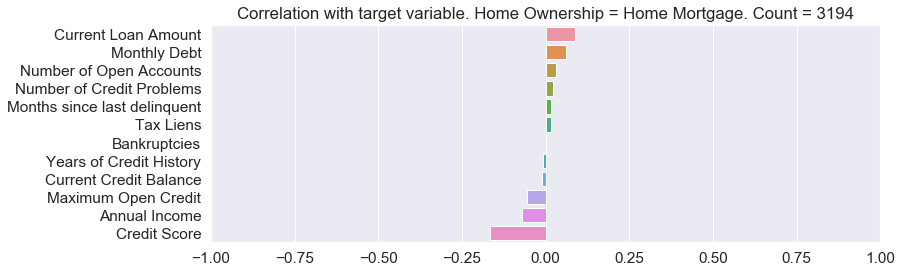

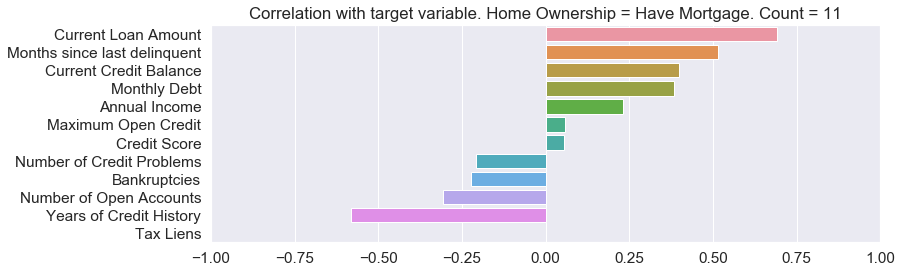

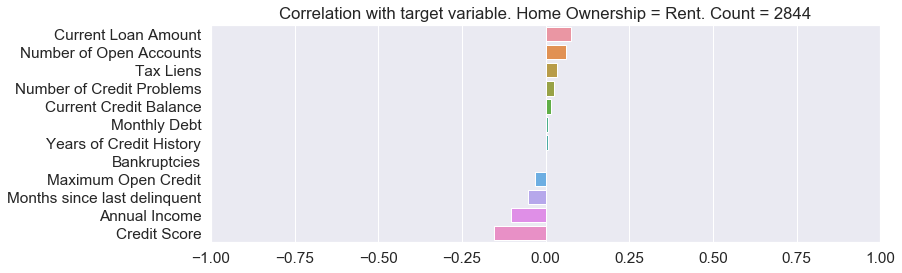

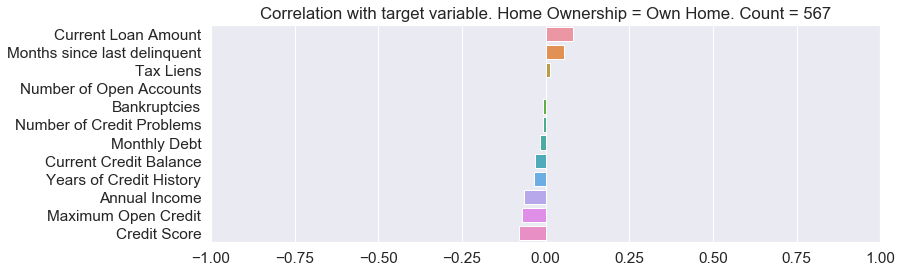

In [882]:
col_name = 'Home Ownership'
graph_corr(col_name, df_train, (12,4))

- Количество лет на текущей работе

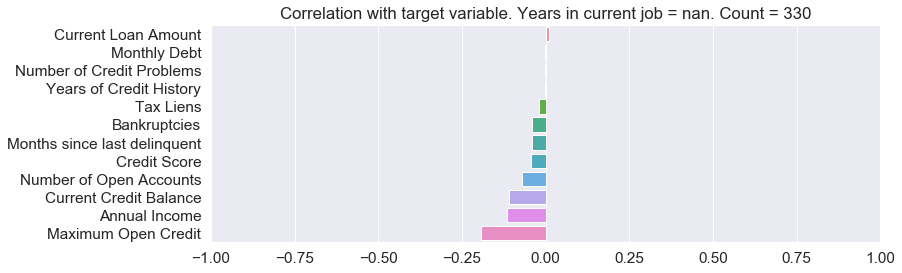

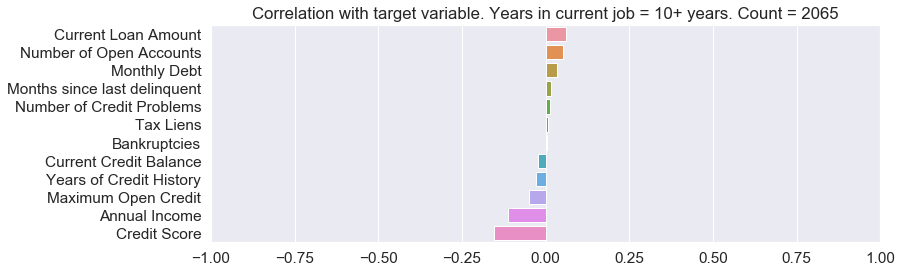

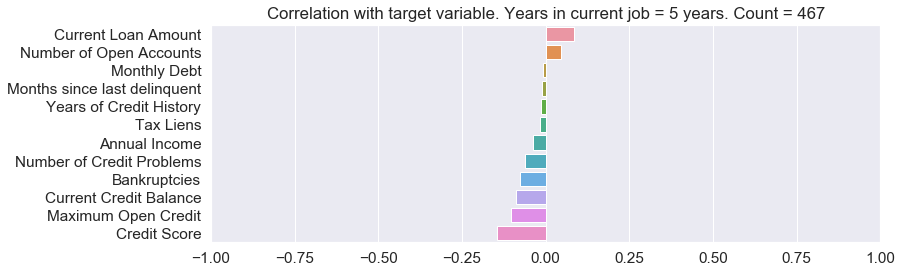

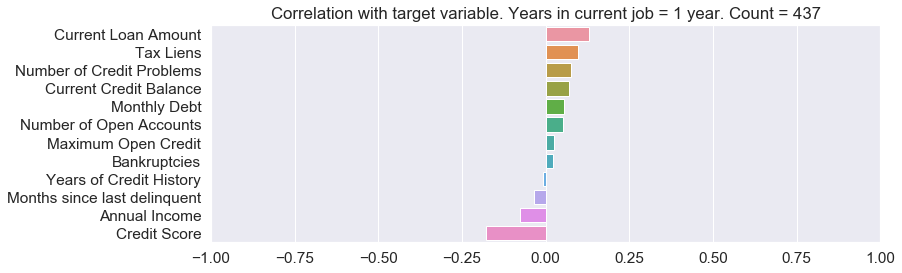

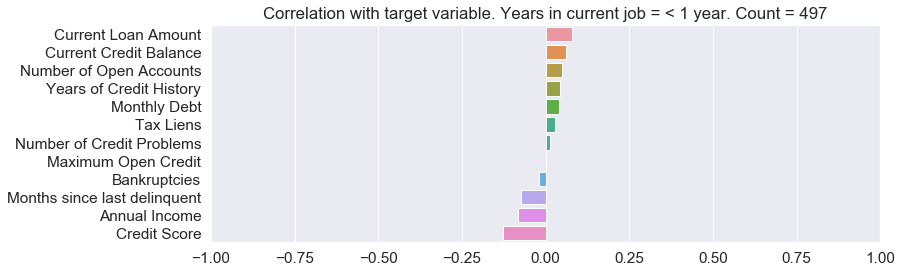

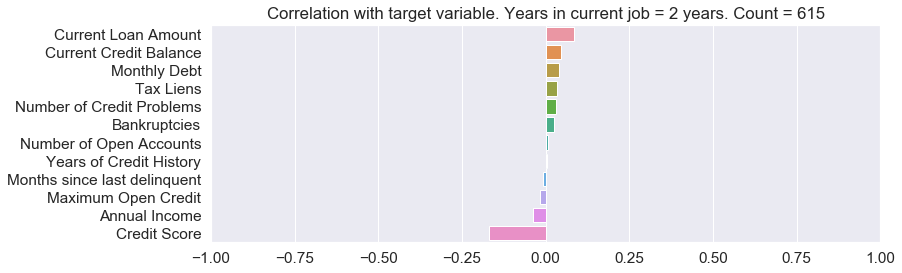

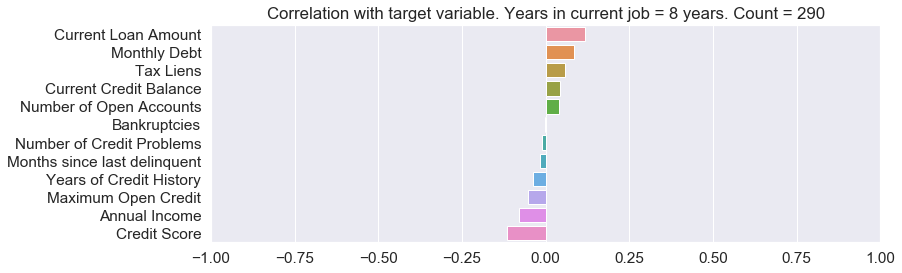

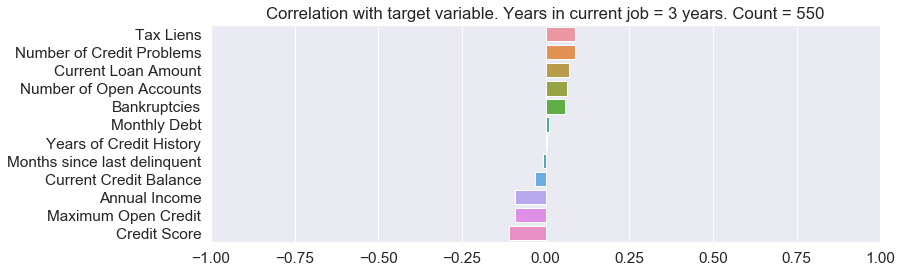

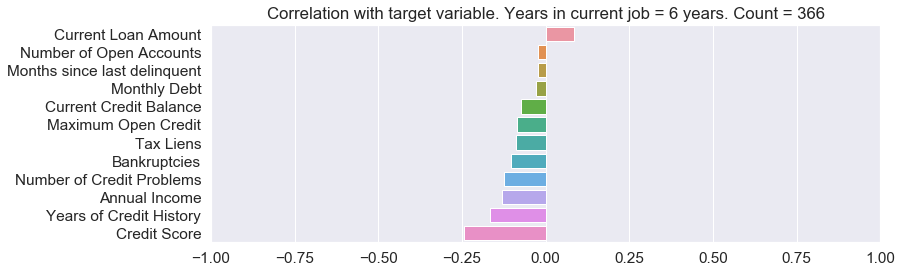

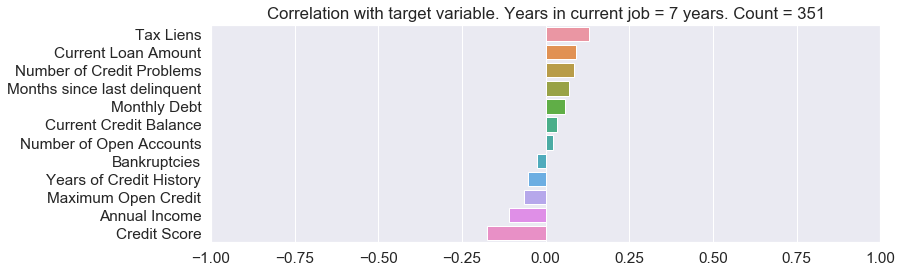

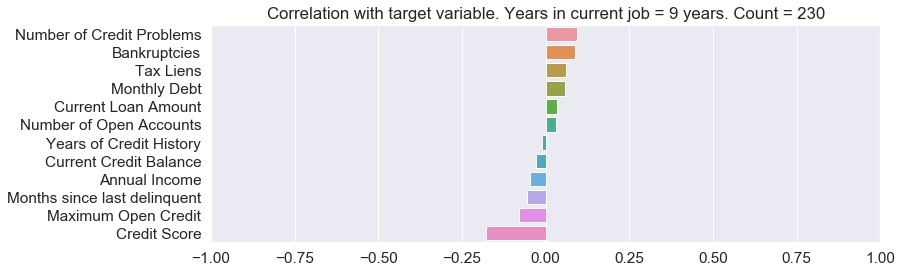

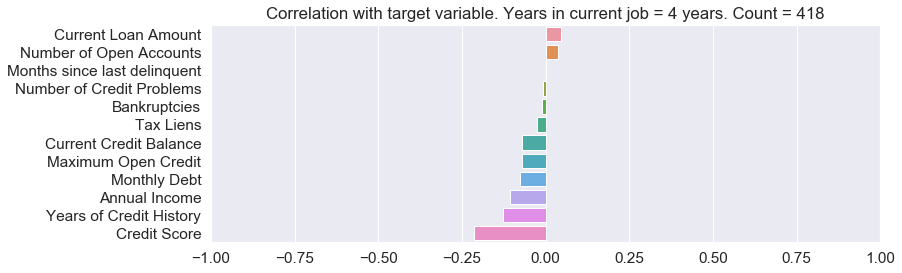

In [883]:
col_name = 'Years in current job'
graph_corr(col_name, df_train, (12,4))

- Цель

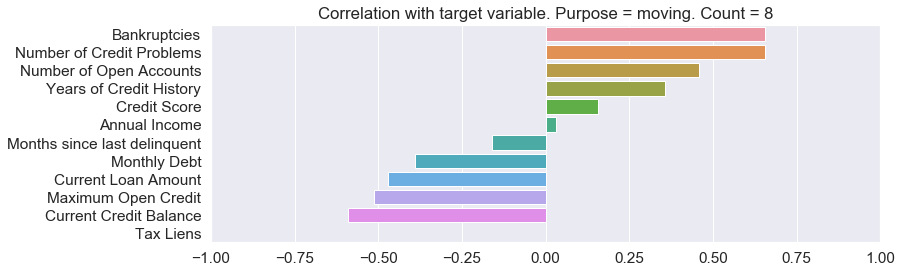

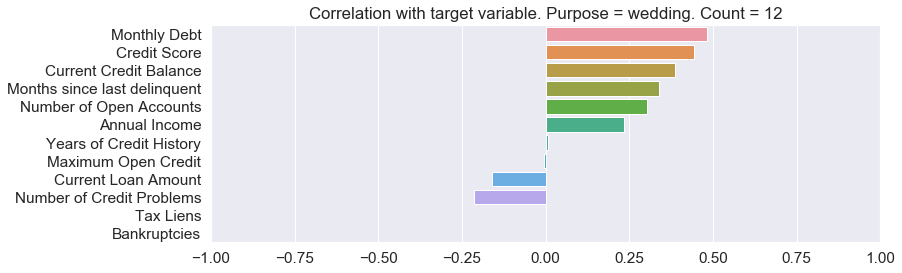

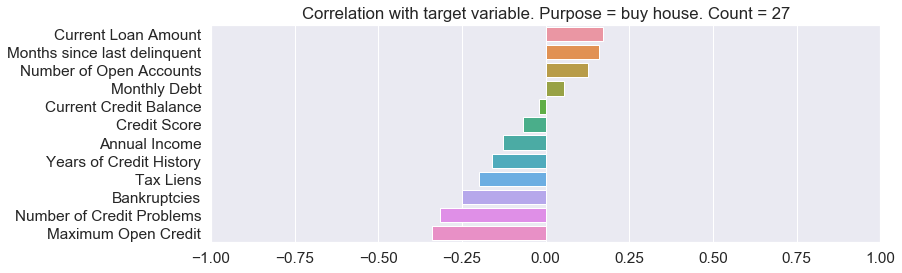

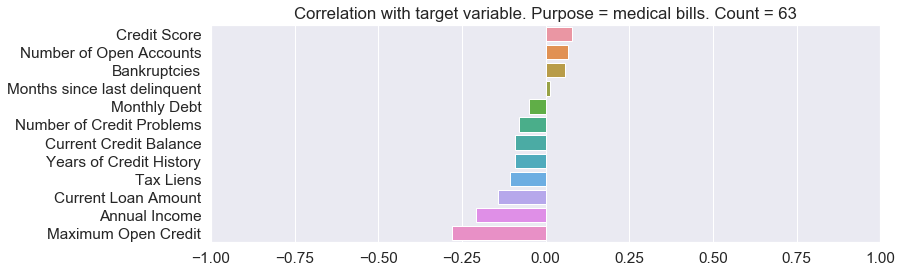

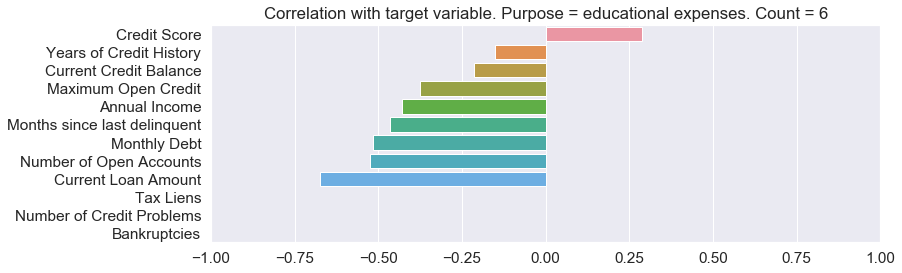

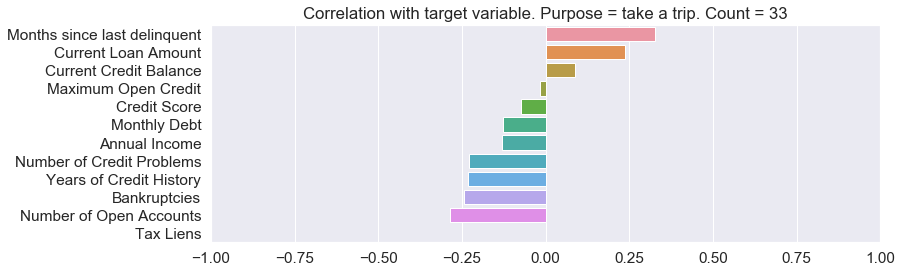

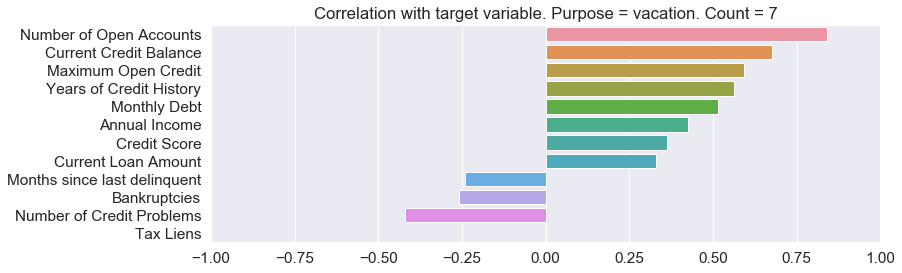

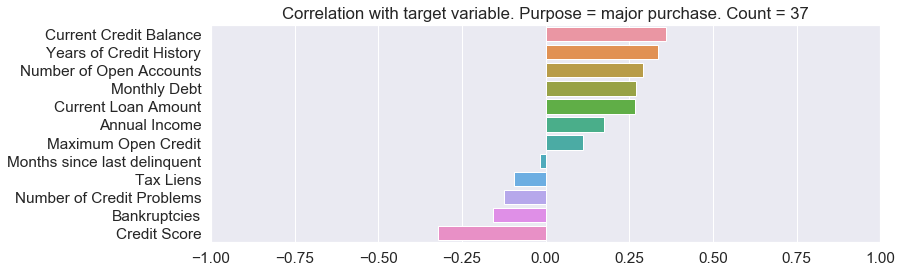

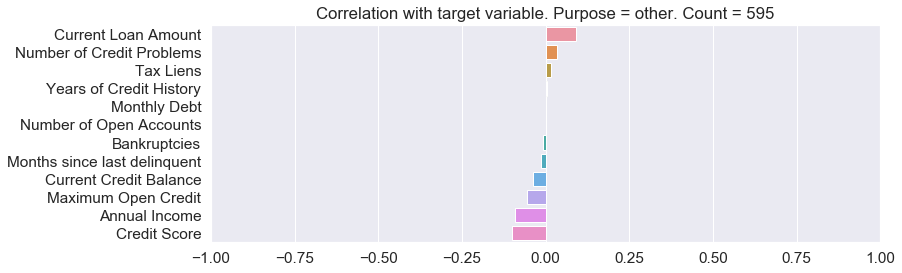

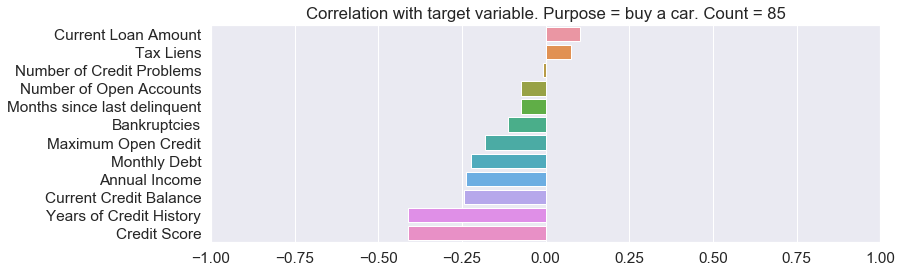

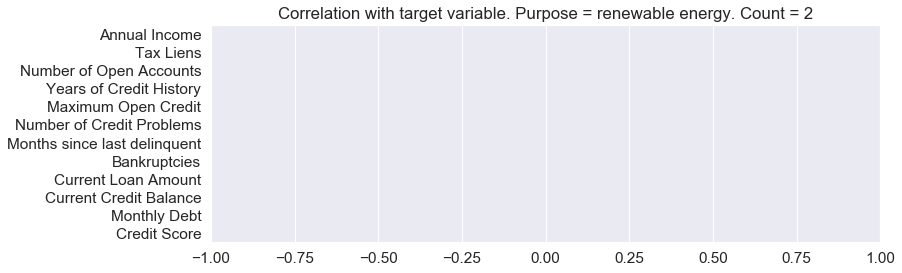

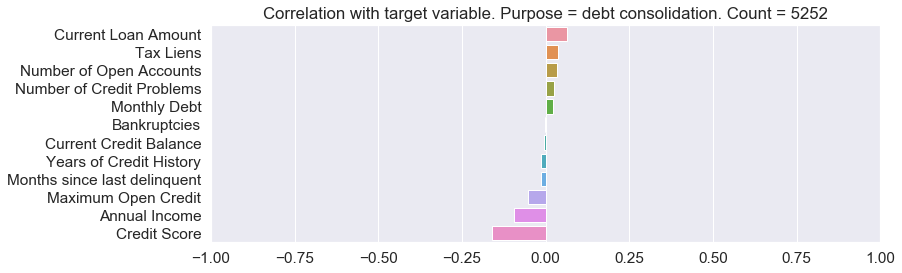

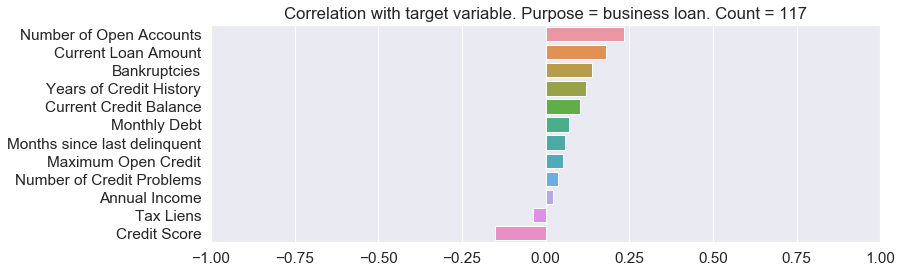

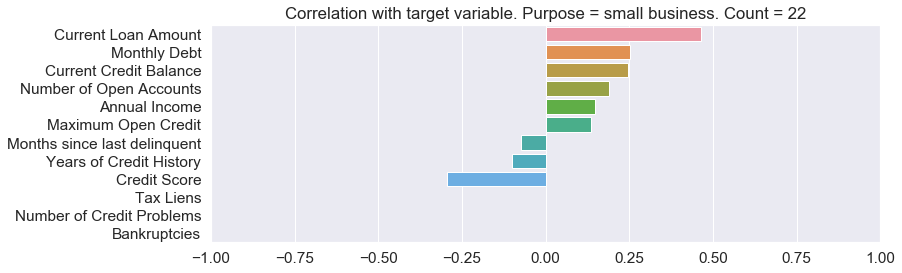

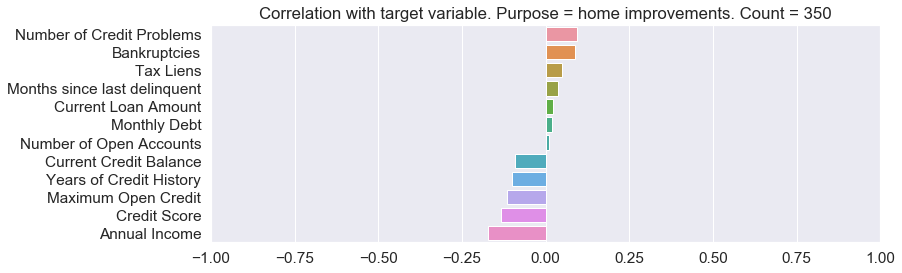

In [884]:
col_name = 'Purpose'
graph_corr(col_name, df_train, (12,4))

- Срочность

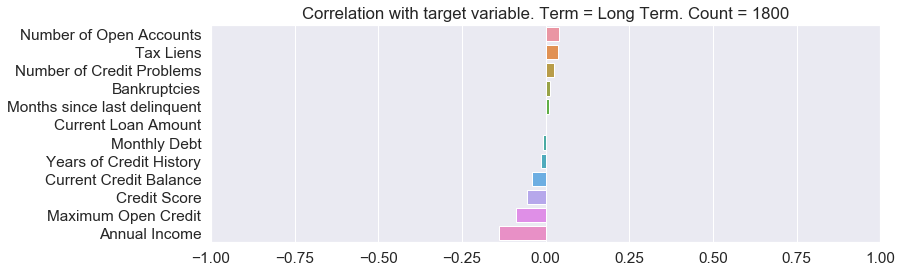

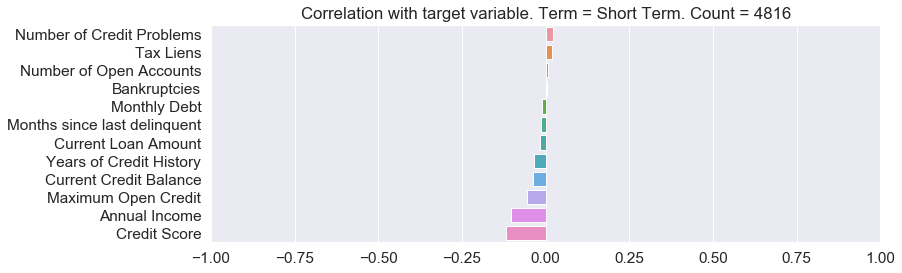

In [885]:
col_name = 'Term'
graph_corr(col_name, df_train, (12,4))

В целом вывод таков, что разбиение на категории играет большую роль, и этим пренебрегать не следует, даже если наблюдений мало. 

Матрица корреляций:

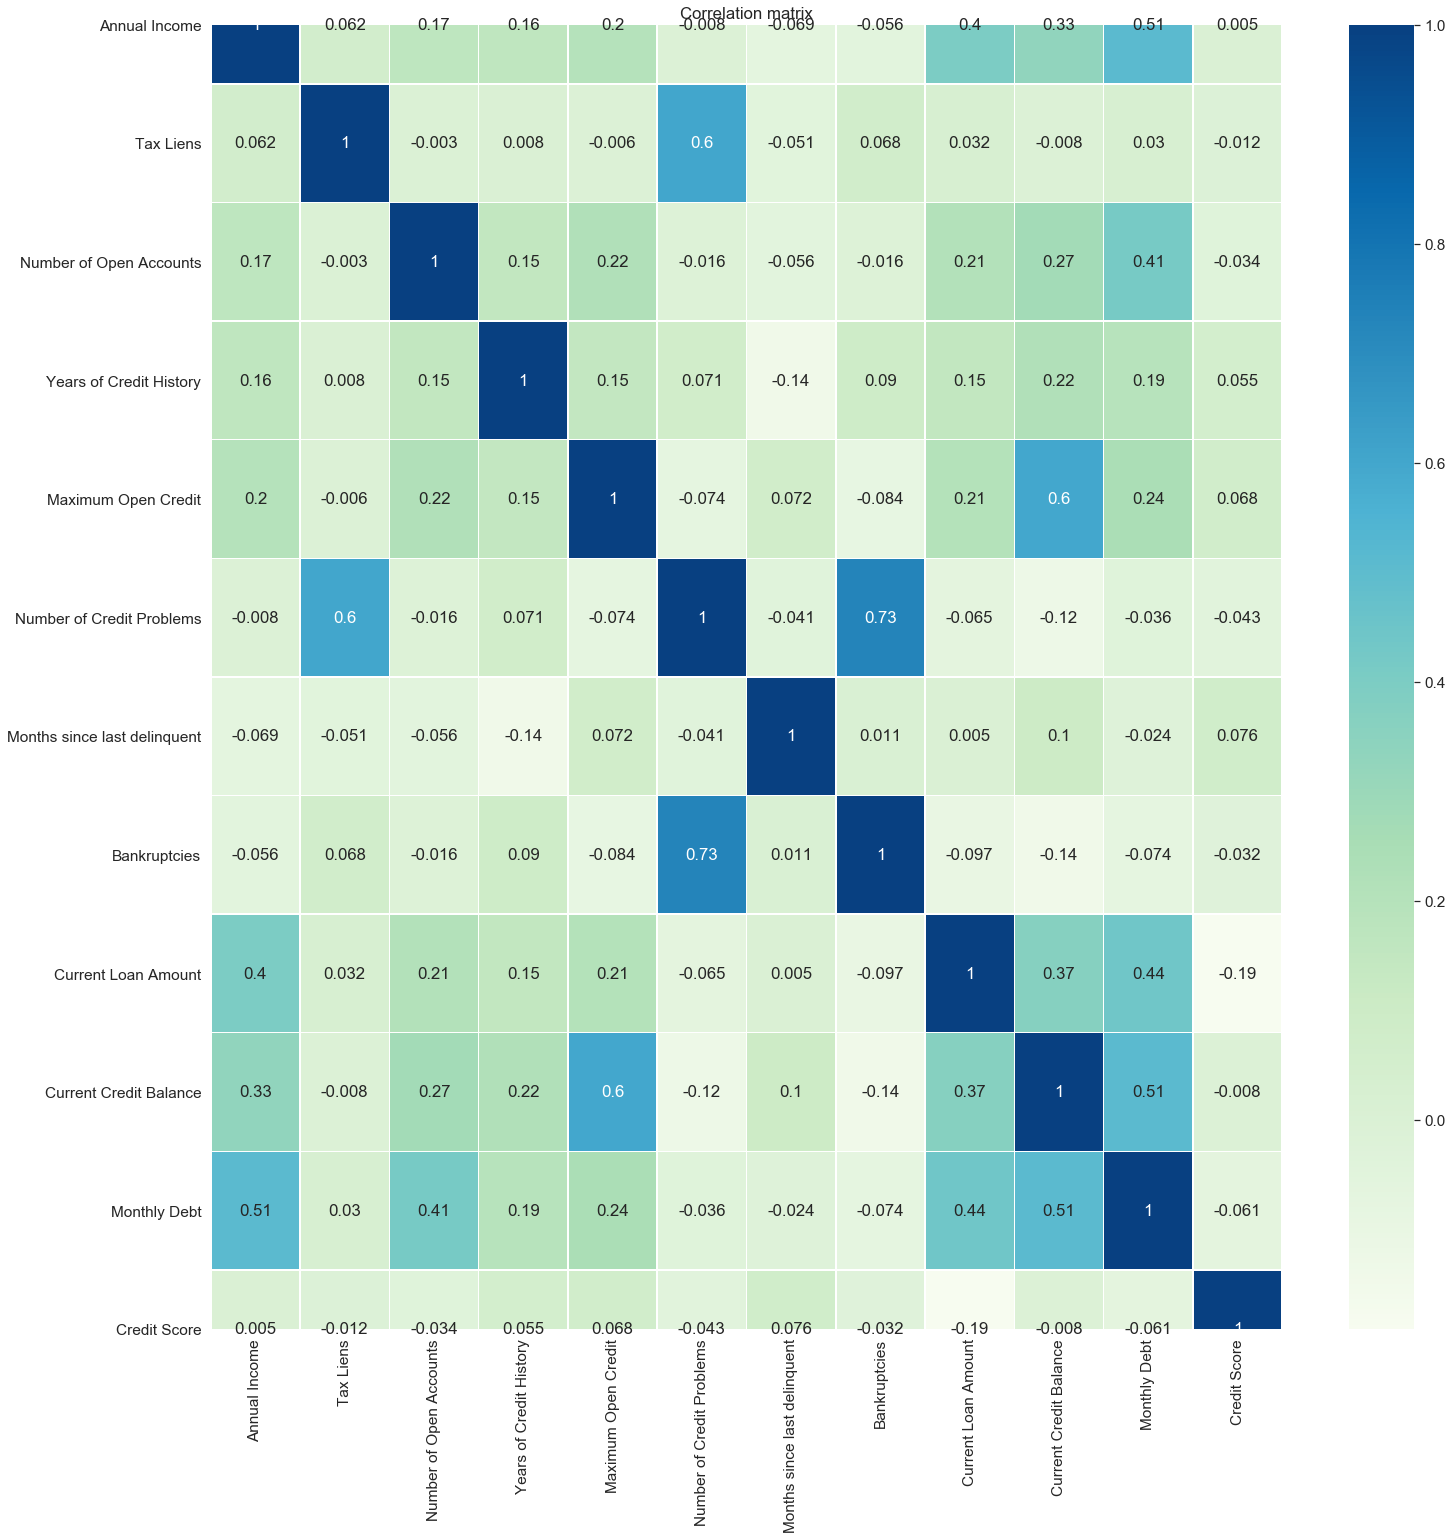

In [886]:
plt.figure(figsize = (24, 24))

bs_fn = df_train.columns.drop('Credit Default').tolist()

sns.set(font_scale = 1.4)
sns.heatmap(df_train[bs_fn].corr().round(3), annot = True, linewidths = 0.5, cmap = 'GnBu')

plt.title('Correlation matrix')
plt.show()

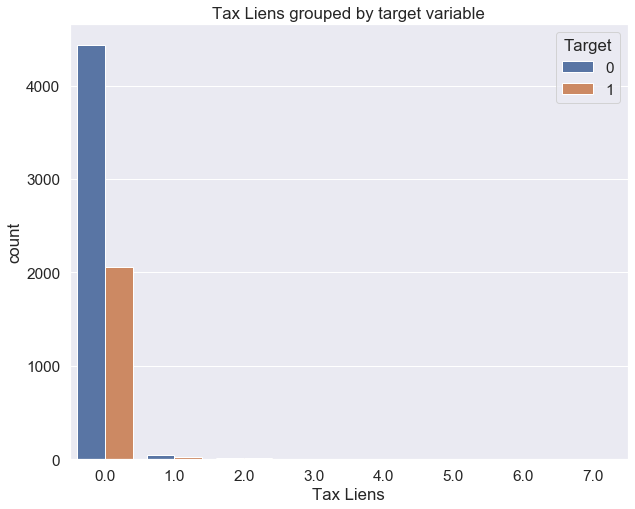

In [887]:
plt.figure(figsize = (10, 8))

col_name = 'Credit Default'
sns.countplot(x = 'Tax Liens', hue = col_name, data = df_train)
plt.title('Tax Liens grouped by target variable')
plt.legend(title = 'Target', loc = 'upper right')

plt.show()

Видим, что в основном признак 'Tax Liens' равен 0 или 1.

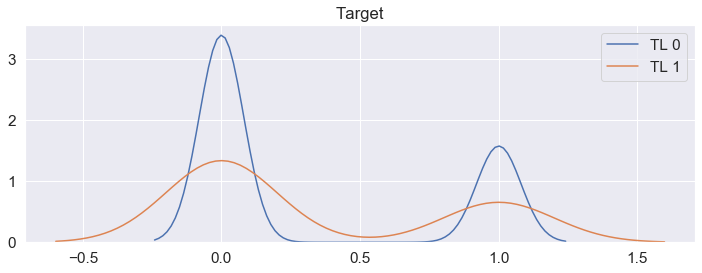

In [888]:
col_name = 'Credit Default'
plt.figure(figsize = (12, 4))
sns.kdeplot(df_train.loc[(df_train['Tax Liens'] == 0), col_name], label = 'TL 0')
sns.kdeplot(df_train.loc[(df_train['Tax Liens'] == 1), col_name], label = 'TL 1')

plt.title('Target')
plt.show()

Видим, что пропорции Default/No default примерно одинаковы как при TL = 0, так и при TL = 1, поэтому признак 'Tax Liens' исключаем.

### 5. Отбор признаков

Еще раз взглянем на корреляцию признаков с целевой переменной 'Credit Default'

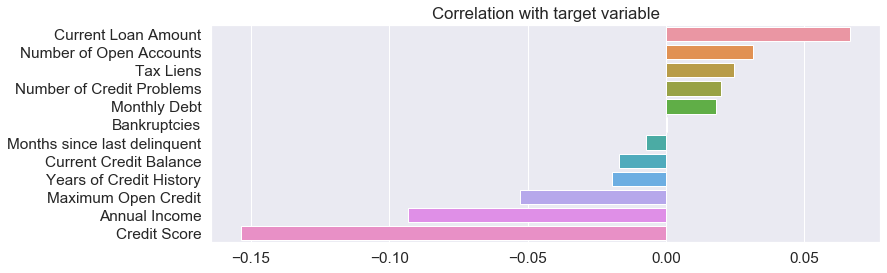

In [889]:
corr_with_target = df_train.corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(12, 4))

sns.barplot(x = corr_with_target.values, y = corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

Видим, что в общем и целом 'Credit Score' антикоррелирован с целевой переменной, что логично (чем выше 'Credit Score', тем вероятнее выдача кредита, т.е. 'Credit Default' = 0). Также и годовой доход, 'Annual Income'. Признак 'Bankruptcies' не коррелирует с целевой переменной, но это еще не означает независимости.

Посмотрим на разные сочетания пар признаков.

In [890]:
col_1 = 'Bankruptcies'
col_2 = 'Credit Default'
show_joint = True

Совместная плотность w(x,y)

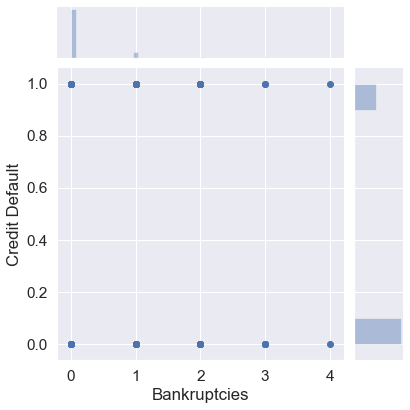

In [891]:
tmp = df_train[[col_1, col_2]]

if show_joint:
    sns.jointplot(x = col_1, y = col_2, data = tmp)
    plt.show()

Безусловная плотность w(x)

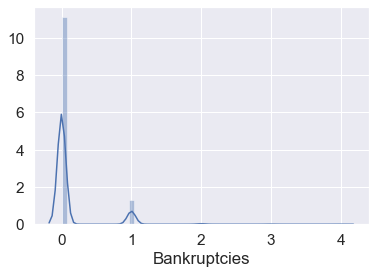

In [892]:
tmp = df_train[col_1]
sns.distplot(tmp, norm_hist = 'True')

plt.show()

Безусловная плотность w(y)

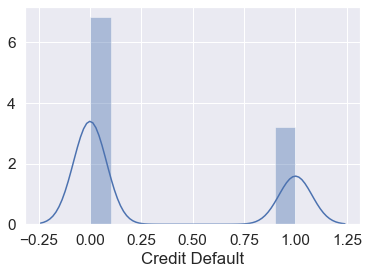

In [893]:
tmp = df_train[col_2]
sns.distplot(tmp, norm_hist = 'True')

plt.show()

Так как "на глазок" w(x,y) = w(x) w(y), то можно сделать вывод о независимости 'Credit Default' от 'Bankruptcies' и удалить 'Bankruptcies', тем более он коррелирует (r = 0.73) с 'Number of Credit Problems'. Дальше пойдем более простым путем: будем оценивать условные среднее значение и среднеквадратическое отклонение и их безусловные значения (т.е. оценки плотностей заменим на оценки двух моментов).

In [894]:
col_1 = 'Monthly Debt'
col_2 = 'Credit Default'

print(df_train[df_train[col_2] == 0][col_1].mean())
print(df_train[df_train[col_2] == 1][col_1].mean())
print(df_train[col_1].mean())

print(df_train[df_train[col_2] == 0][col_1].std())
print(df_train[df_train[col_2] == 1][col_1].std())
print(df_train[col_1].std())

18235.86021743954
18693.963963963964
18381.891172914147
11848.674882863092
11940.796232800969
11879.133930409462


Видим, что условные от безусловного не особенно отличаются (критериями согласия пренебрегаем), значит можно пренебречь признаком 'Monthly Debt'.

In [895]:
col_1 = 'Months since last delinquent'
col_2 = 'Credit Default'

print(df_train[df_train[col_2] == 0][col_1].mean())
print(df_train[df_train[col_2] == 1][col_1].mean())
print(df_train[col_1].mean())

print(df_train[df_train[col_2] == 0][col_1].std())
print(df_train[df_train[col_2] == 1][col_1].std())
print(df_train[col_1].std())

342.00399378744174
337.69084874348033
340.62908101571946
281.97184697656434
282.2800216841802
282.05594556227913


Аналогично пренебрегаем признаком 'Months since last delinquent'.

In [896]:
col_1 = 'Current Credit Balance'
col_2 = 'Credit Default'

print(df_train[df_train[col_2] == 0][col_1].mean())
print(df_train[df_train[col_2] == 1][col_1].mean())
print(df_train[col_1].mean())

print(df_train[df_train[col_2] == 0][col_1].std())
print(df_train[df_train[col_2] == 1][col_1].std())
print(df_train[col_1].std())

291475.4335478145
280129.24324324325
287858.57814389357
330524.727635305
265928.1965655225
311416.25389420486


А вот признаком 'Current Credit Balance' пренебрегать не следует.

In [897]:
cols_for_drop = ['Bankruptcies', 'Monthly Debt', 'Months since last delinquent', 'Tax Liens']
try:
    df_train.drop(columns = cols_for_drop, inplace = True)
except:
    print('Columns were deleted')

df_train.head()

,Home Ownership,Annual Income,Years in current job,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Purpose,Term,Current Loan Amount,Current Credit Balance,Credit Score,Credit Default
1,Own Home,1025487.0,10+ years,15.0,15.3,1181730.0,0.0,debt consolidation,Long Term,264968.0,394972.0,737.0,1
3,Own Home,805068.0,6 years,8.0,22.5,147400.0,1.0,debt consolidation,Short Term,121396.0,95855.0,694.0,0
4,Rent,776264.0,8 years,13.0,13.6,385836.0,1.0,debt consolidation,Short Term,125840.0,93309.0,719.0,0
5,Rent,1221415.0,7 years,12.0,14.6,366784.0,0.0,other,Long Term,337304.0,165680.0,730.0,1
7,Rent,1040060.0,10+ years,13.0,12.0,330374.0,0.0,other,Short Term,250888.0,89015.0,705.0,1


In [898]:
df_train.describe()

,Annual Income,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Current Loan Amount,Current Credit Balance,Credit Score,Credit Default
count,6.616000e+03,6616.000000,6616.000000,6.616000e+03,6616.000000,6616.000000,6.616000e+03,6616.000000,6616.000000
mean,1.324921e+06,11.130744,18.291868,6.655611e+05,0.171705,309247.848247,2.878586e+05,721.066052,0.318773
std,7.325376e+05,4.922712,7.045092,1.108088e+06,0.503194,182211.088327,3.114163e+05,25.486351,0.466036
min,1.645970e+05,2.000000,4.000000,0.000000e+00,0.000000,21472.000000,0.000000e+00,585.000000,0.000000
25%,9.381012e+05,8.000000,13.500000,2.765565e+05,0.000000,173052.000000,1.143088e+05,714.000000,0.000000
50%,1.221415e+06,10.000000,17.000000,4.734730e+05,0.000000,265870.000000,2.091900e+05,730.000000,0.000000
75%,1.458886e+06,14.000000,21.800000,7.840030e+05,0.000000,430100.000000,3.587770e+05,736.250000,1.000000
max,1.014934e+07,43.000000,57.700000,5.756256e+07,7.000000,789030.000000,6.506797e+06,751.000000,1.000000


In [899]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6616 entries, 1 to 7499
Data columns (total 13 columns):
Home Ownership               6616 non-null object
Annual Income                6616 non-null float64
Years in current job         6286 non-null object
Number of Open Accounts      6616 non-null float64
Years of Credit History      6616 non-null float64
Maximum Open Credit          6616 non-null float64
Number of Credit Problems    6616 non-null float64
Purpose                      6616 non-null object
Term                         6616 non-null object
Current Loan Amount          6616 non-null float64
Current Credit Balance       6616 non-null float64
Credit Score                 6616 non-null float64
Credit Default               6616 non-null int64
dtypes: float64(8), int64(1), object(4)
memory usage: 1.0+ MB


Обзор object-признаков

In [900]:
for cat_colname in df_train.select_dtypes(include = 'object').columns:
    print(str(cat_colname) + '\n\n' + str(df_train[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    3194
Rent             2844
Own Home          567
Have Mortgage      11
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

10+ years    2065
2 years       615
3 years       550
< 1 year      497
5 years       467
1 year        437
4 years       418
6 years       366
7 years       351
8 years       290
9 years       230
Name: Years in current job, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      5252
other                    595
home improvements        350
business loan            117
buy a car                 85
medical bills             63
major purchase            37
take a trip               33
buy house                 27
small business            22
wedding                   12
moving                     8
vacation                   7
educationa

То есть чаще всего кредит берут краткосрочный, для того чтобы создать единый кредитный счет (debt consolidation) с пониженной ставкой, при этом работают на одной работе более 10 лет и имеют ипотеку.

Проверка на пропуски

In [901]:
len(df_train) - df_train.count()

Home Ownership                 0
Annual Income                  0
Years in current job         330
Number of Open Accounts        0
Years of Credit History        0
Maximum Open Credit            0
Number of Credit Problems      0
Purpose                        0
Term                           0
Current Loan Amount            0
Current Credit Balance         0
Credit Score                   0
Credit Default                 0
dtype: int64

Как мы уже говорили, NaN в поле 'Years in current job' пропуском не считается. Однако, заменим NaN на 'None' (нет текущей работы).

In [902]:
col_name = 'Years in current job'
df_train[col_name].fillna('None', inplace = True)

In [903]:
len(df_train) - df_train.count()

Home Ownership               0
Annual Income                0
Years in current job         0
Number of Open Accounts      0
Years of Credit History      0
Maximum Open Credit          0
Number of Credit Problems    0
Purpose                      0
Term                         0
Current Loan Amount          0
Current Credit Balance       0
Credit Score                 0
Credit Default               0
dtype: int64

In [904]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6616 entries, 1 to 7499
Data columns (total 13 columns):
Home Ownership               6616 non-null object
Annual Income                6616 non-null float64
Years in current job         6616 non-null object
Number of Open Accounts      6616 non-null float64
Years of Credit History      6616 non-null float64
Maximum Open Credit          6616 non-null float64
Number of Credit Problems    6616 non-null float64
Purpose                      6616 non-null object
Term                         6616 non-null object
Current Loan Amount          6616 non-null float64
Current Credit Balance       6616 non-null float64
Credit Score                 6616 non-null float64
Credit Default               6616 non-null int64
dtypes: float64(8), int64(1), object(4)
memory usage: 1.0+ MB


Выделение dummy-переменных

Сначала заменим значения '10+ years' на '10 more years', т.к. Xboost ругается на недопустимые символы. А также '< 1 year' на 'less than 1 years'.

In [905]:
col_name = 'Years in current job'
df_train.loc[(df_train[col_name] == '10+ years'), col_name] = '10 more years'
df_train.loc[(df_train[col_name] == '< 1 year'), col_name] = 'less than 1 year'

In [906]:
for c in df_train.select_dtypes(include = 'object').columns:
    df_train = pd.concat([df_train, pd.get_dummies(df_train[c], prefix = c)], axis=1)

In [907]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6616 entries, 1 to 7499
Data columns (total 46 columns):
Home Ownership                           6616 non-null object
Annual Income                            6616 non-null float64
Years in current job                     6616 non-null object
Number of Open Accounts                  6616 non-null float64
Years of Credit History                  6616 non-null float64
Maximum Open Credit                      6616 non-null float64
Number of Credit Problems                6616 non-null float64
Purpose                                  6616 non-null object
Term                                     6616 non-null object
Current Loan Amount                      6616 non-null float64
Current Credit Balance                   6616 non-null float64
Credit Score                             6616 non-null float64
Credit Default                           6616 non-null int64
Home Ownership_Have Mortgage             6616 non-null uint8
Home Ownership_Home

In [908]:
df_train.head()

,Home Ownership,Annual Income,Years in current job,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Purpose,Term,Current Loan Amount,...,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_renewable energy,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding,Term_Long Term,Term_Short Term
1,Own Home,1025487.0,10 more years,15.0,15.3,1181730.0,0.0,debt consolidation,Long Term,264968.0,...,0,0,0,0,0,0,0,0,1,0
3,Own Home,805068.0,6 years,8.0,22.5,147400.0,1.0,debt consolidation,Short Term,121396.0,...,0,0,0,0,0,0,0,0,0,1
4,Rent,776264.0,8 years,13.0,13.6,385836.0,1.0,debt consolidation,Short Term,125840.0,...,0,0,0,0,0,0,0,0,0,1
5,Rent,1221415.0,7 years,12.0,14.6,366784.0,0.0,other,Long Term,337304.0,...,0,0,1,0,0,0,0,0,1,0
7,Rent,1040060.0,10 more years,13.0,12.0,330374.0,0.0,other,Short Term,250888.0,...,0,0,1,0,0,0,0,0,0,1


Сохранение обучающего датасета

In [923]:
df_train.to_csv('prep_train.csv', index = False, encoding = 'utf-8')

### 6. Балансировка классов

In [924]:
def balance_df_by_target(df, target_name):
    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.idxmax()
    minor_class_name = target_counts.idxmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index = True)

    return df.sample(frac = 1) 

In [925]:
col_name = 'Credit Default'
df_balanced = balance_df_by_target(df_train, col_name)

После балансировки:

In [926]:
df_balanced[col_name].value_counts()

0    4507
1    4218
Name: Credit Default, dtype: int64

До балансировки:

In [927]:
df_train[col_name].value_counts()

0    4507
1    2109
Name: Credit Default, dtype: int64

### 7. Подбор моделей

In [928]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb, lightgbm as lgbm, catboost as catb

In [929]:
import pickle

In [930]:
df_base = pd.read_csv(train_path)

Нормализация данных

In [931]:
NUMERIC_FEATURE_NAMES = df_train.select_dtypes(include = 'float64').columns.to_list()
TARGET_NAME = 'Credit Default'

scaler = StandardScaler()

df_norm = df_balanced.copy()
df_norm[NUMERIC_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUMERIC_FEATURE_NAMES])

df = df_norm.copy()

In [932]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [933]:
try:
    BASE_FEATURE_NAMES = list(set(df_base.columns.drop(TARGET_NAME).tolist()) - set(cols_for_drop))
except:
    print('Columns were droped')
try:
    NEW_FEATURE_NAMES = df.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES).tolist()
except:
    print('Columns were droped')
FEATURE_NAMES_SELECTED = NUMERIC_FEATURE_NAMES + NEW_FEATURE_NAMES

In [934]:
NUMERIC_FEATURE_NAMES

['Annual Income',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Current Loan Amount',
 'Current Credit Balance',
 'Credit Score']

In [935]:
NEW_FEATURE_NAMES

['Home Ownership_Have Mortgage',
 'Home Ownership_Home Mortgage',
 'Home Ownership_Own Home',
 'Home Ownership_Rent',
 'Years in current job_1 year',
 'Years in current job_10 more years',
 'Years in current job_2 years',
 'Years in current job_3 years',
 'Years in current job_4 years',
 'Years in current job_5 years',
 'Years in current job_6 years',
 'Years in current job_7 years',
 'Years in current job_8 years',
 'Years in current job_9 years',
 'Years in current job_None',
 'Years in current job_less than 1 year',
 'Purpose_business loan',
 'Purpose_buy a car',
 'Purpose_buy house',
 'Purpose_debt consolidation',
 'Purpose_educational expenses',
 'Purpose_home improvements',
 'Purpose_major purchase',
 'Purpose_medical bills',
 'Purpose_moving',
 'Purpose_other',
 'Purpose_renewable energy',
 'Purpose_small business',
 'Purpose_take a trip',
 'Purpose_vacation',
 'Purpose_wedding',
 'Term_Long Term',
 'Term_Short Term']

In [937]:
X = df[FEATURE_NAMES_SELECTED]
Y = df[TARGET_NAME]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle = True, test_size = 0.25, random_state = 21)

- Логистическая регрессия

In [938]:
model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)

Y_train_pred = model_lr.predict(X_train)
Y_test_pred = model_lr.predict(X_test)

get_classification_report(Y_train, Y_train_pred, Y_test, Y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.63      0.70      0.66      3369
           1       0.64      0.56      0.60      3174

    accuracy                           0.63      6543
   macro avg       0.63      0.63      0.63      6543
weighted avg       0.63      0.63      0.63      6543

TEST

              precision    recall  f1-score   support

           0       0.61      0.68      0.64      1138
           1       0.60      0.52      0.56      1044

    accuracy                           0.61      2182
   macro avg       0.61      0.60      0.60      2182
weighted avg       0.61      0.61      0.60      2182

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               775  363
1               496  548


c:\users\novikov\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


- k ближайших соседей

In [939]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, Y_train)

Y_train_pred = model_knn.predict(X_train)
Y_test_pred = model_knn.predict(X_test)

get_classification_report(Y_train, Y_train_pred, Y_test, Y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.75      0.74      0.75      3369
           1       0.73      0.74      0.74      3174

    accuracy                           0.74      6543
   macro avg       0.74      0.74      0.74      6543
weighted avg       0.74      0.74      0.74      6543

TEST

              precision    recall  f1-score   support

           0       0.64      0.61      0.62      1138
           1       0.59      0.63      0.61      1044

    accuracy                           0.62      2182
   macro avg       0.62      0.62      0.62      2182
weighted avg       0.62      0.62      0.62      2182

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               690  448
1               388  656


- XBoost

In [940]:
model_xgb = xgb.XGBClassifier(random_state = 21)
model_xgb.fit(X_train, Y_train)

Y_train_pred = model_xgb.predict(X_train)
Y_test_pred = model_xgb.predict(X_test)

get_classification_report(Y_train, Y_train_pred, Y_test, Y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      3369
           1       0.69      0.65      0.67      3174

    accuracy                           0.69      6543
   macro avg       0.69      0.69      0.69      6543
weighted avg       0.69      0.69      0.69      6543

TEST

              precision    recall  f1-score   support

           0       0.63      0.67      0.65      1138
           1       0.62      0.57      0.59      1044

    accuracy                           0.62      2182
   macro avg       0.62      0.62      0.62      2182
weighted avg       0.62      0.62      0.62      2182

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               763  375
1               444  600


- LightGBM

In [941]:
model_lgbm = lgbm.LGBMClassifier(random_state = 21)
model_lgbm.fit(X_train, Y_train)

Y_train_pred = model_lgbm.predict(X_train)
Y_test_pred = model_lgbm.predict(X_test)

get_classification_report(Y_train, Y_train_pred, Y_test, Y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      3369
           1       0.87      0.85      0.86      3174

    accuracy                           0.86      6543
   macro avg       0.86      0.86      0.86      6543
weighted avg       0.86      0.86      0.86      6543

TEST

              precision    recall  f1-score   support

           0       0.69      0.67      0.68      1138
           1       0.65      0.66      0.66      1044

    accuracy                           0.67      2182
   macro avg       0.67      0.67      0.67      2182
weighted avg       0.67      0.67      0.67      2182

CONFUSION MATRIX

col_0             0    1
Credit Default          
0               766  372
1               351  693


- CatBoost

In [942]:
model_catb = catb.CatBoostClassifier(silent = True, random_state = 21)
model_catb.fit(X_train, Y_train)

Y_train_pred = model_catb.predict(X_train)
Y_test_pred = model_catb.predict(X_test)

get_classification_report(Y_train, Y_train_pred, Y_test, Y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      3369
           1       0.88      0.86      0.87      3174

    accuracy                           0.87      6543
   macro avg       0.87      0.87      0.87      6543
weighted avg       0.87      0.87      0.87      6543

TEST

              precision    recall  f1-score   support

           0       0.70      0.68      0.69      1138
           1       0.67      0.69      0.68      1044

    accuracy                           0.69      2182
   macro avg       0.68      0.69      0.68      2182
weighted avg       0.69      0.69      0.69      2182

CONFUSION MATRIX

col_0           0.0  1.0
Credit Default          
0               776  362
1               325  719


Предварительно отдадим предпочтение модели CatBoost.

### 8. Выбор наилучшей модели

In [943]:
params = {'n_estimators':[100, 150, 200, 250], 
          'max_depth':[5, 7, 9, 11],
          'learning_rate':[0.05, 0.1, 0.15, 0.2]}

cv = KFold(n_splits = 3, random_state = 21, shuffle = True)
rs = RandomizedSearchCV(model_catb, params, scoring = 'f1', cv = cv, n_jobs = -1)
rs.fit(X_train, Y_train)

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=21, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=<catboost.core.CatBoostClassifier object at 0x000000002E91FE88>,
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [5, 7, 9, 11],
                                        'n_estimators': [100, 150, 200, 250]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='f1', verbose=0)

In [944]:
rs.best_params_

{'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.15}

In [945]:
rs.best_score_

0.7139819835688895

In [947]:
n_e = 200
m_d = 9
l_r = 0.15

In [948]:
final_model = catb.CatBoostClassifier(n_estimators = n_e, max_depth = m_d, learning_rate = l_r,
                                      silent = True, random_state = 21)
final_model.fit(X_train, Y_train)

Y_train_pred = final_model.predict(X_train)
Y_test_pred = final_model.predict(X_test)

get_classification_report(Y_train, Y_train_pred, Y_test, Y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3369
           1       0.99      0.98      0.99      3174

    accuracy                           0.99      6543
   macro avg       0.99      0.99      0.99      6543
weighted avg       0.99      0.99      0.99      6543

TEST

              precision    recall  f1-score   support

           0       0.82      0.71      0.76      1138
           1       0.73      0.83      0.78      1044

    accuracy                           0.77      2182
   macro avg       0.77      0.77      0.77      2182
weighted avg       0.78      0.77      0.77      2182

CONFUSION MATRIX

col_0           0.0  1.0
Credit Default          
0               811  327
1               175  869


Так как f1-score на train и test сильно отличаются, то, вероятно, имеет место переобучение.

### 9. Борьба с переобучением

In [949]:
def show_proba_calibration_plots(y_predicted_probs, y_true_labels):
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(0.1, 0.9, 9):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))

    scores_table = pd.DataFrame({'f1':f1_scores,
                                 'precision':precisions,
                                 'recall':recalls,
                                 'probability':thresholds}).sort_values('f1', ascending=False).round(3)
  
    figure = plt.figure(figsize = (15, 5))

    plt1 = figure.add_subplot(121)
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25))   
    plt1.table(cellText = scores_table.values,
               colLabels = scores_table.columns, 
               colLoc = 'center', cellLoc = 'center', loc = 'bottom', bbox = [0, -1.3, 1, 1])

    plt2 = figure.add_subplot(122)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 0][:, 0], 
              label='Another class', color='royalblue', alpha=1)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 1][:, 0], 
              label='Main class', color='darkcyan', alpha=0.8)
    plt2.set_ylabel('Number of examples')
    plt2.set_xlabel('Probabilities')
    plt2.set_title('Probability histogram')
    plt2.legend(bbox_to_anchor=(1, 1))

    plt.show()

In [950]:
def show_learning_curve_plot(estimator, X, y, cv=3, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, 
                                                            cv=cv, 
                                                            scoring='f1',
                                                            train_sizes=train_sizes, 
                                                            n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(15,8))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.title(f"Learning curves ({type(estimator).__name__})")
    plt.xlabel("Training examples")
    plt.ylabel("Score")     
    plt.legend(loc="best")
    plt.grid()
    plt.show()

In [951]:
def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
       
    plt.figure(figsize = (25, len(feature_importances) * 0.3))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'])
    
    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()
    
    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()

In [952]:
final_model = catb.CatBoostClassifier(n_estimators = n_e, max_depth = m_d, learning_rate = l_r,
                                      silent = True, random_state = 21, l2_leaf_reg = 30)
final_model.fit(X_train, Y_train)

Y_train_pred = final_model.predict(X_train)
Y_test_pred = final_model.predict(X_test)
Y_test_pred_probs = final_model.predict_proba(X_test)

get_classification_report(Y_train, Y_train_pred, Y_test, Y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      3369
           1       0.93      0.92      0.92      3174

    accuracy                           0.92      6543
   macro avg       0.92      0.92      0.92      6543
weighted avg       0.92      0.92      0.92      6543

TEST

              precision    recall  f1-score   support

           0       0.74      0.68      0.70      1138
           1       0.68      0.74      0.70      1044

    accuracy                           0.70      2182
   macro avg       0.71      0.71      0.70      2182
weighted avg       0.71      0.70      0.70      2182

CONFUSION MATRIX

col_0           0.0  1.0
Credit Default          
0               769  369
1               275  769


In [953]:
final_model = catb.CatBoostClassifier(n_estimators = n_e, max_depth = m_d, learning_rate = l_r,
                                      silent = True, random_state = 21,
                                      l2_leaf_reg = 100)
final_model.fit(X_train, Y_train)

Y_train_pred = final_model.predict(X_train)
Y_test_pred = final_model.predict(X_test)
Y_test_pred_probs = final_model.predict_proba(X_test)

get_classification_report(Y_train, Y_train_pred, Y_test, Y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      3369
           1       0.85      0.84      0.85      3174

    accuracy                           0.85      6543
   macro avg       0.85      0.85      0.85      6543
weighted avg       0.85      0.85      0.85      6543

TEST

              precision    recall  f1-score   support

           0       0.70      0.68      0.69      1138
           1       0.66      0.68      0.67      1044

    accuracy                           0.68      2182
   macro avg       0.68      0.68      0.68      2182
weighted avg       0.68      0.68      0.68      2182

CONFUSION MATRIX

col_0           0.0  1.0
Credit Default          
0               775  363
1               339  705


In [954]:
X.shape

(8725, 41)

In [955]:
Y.shape

(8725,)

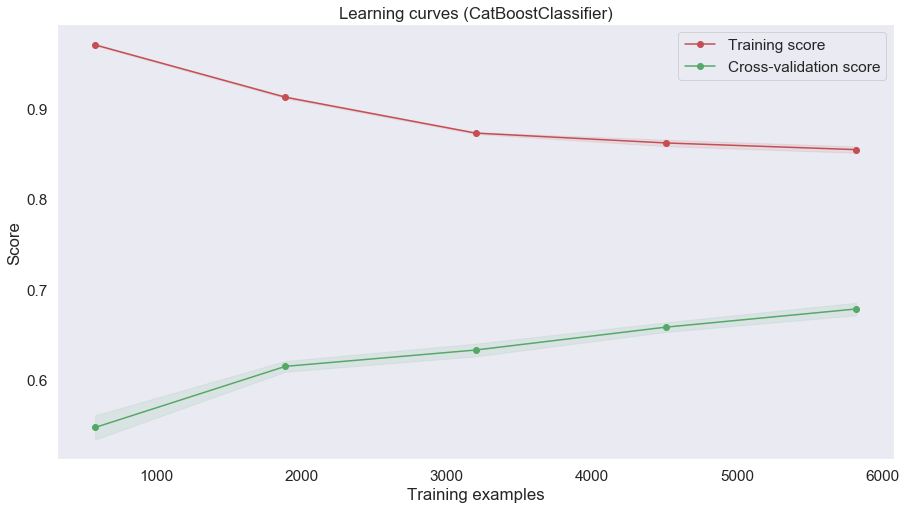

In [956]:
show_learning_curve_plot(final_model, X, Y)

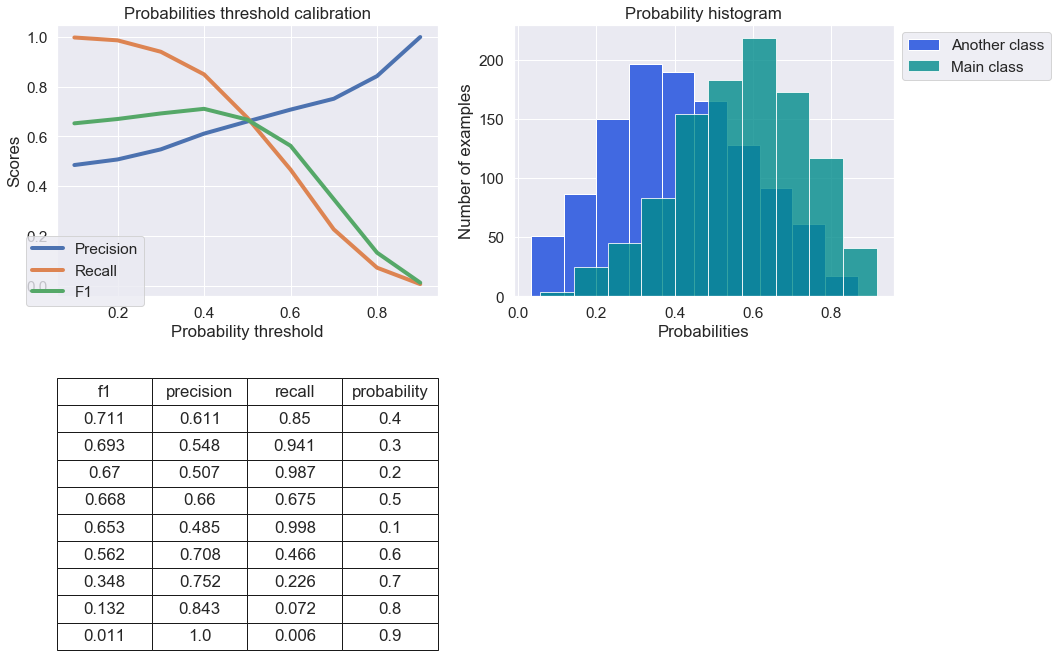

In [957]:
show_proba_calibration_plots(Y_test_pred_probs[:, 1], Y_test)

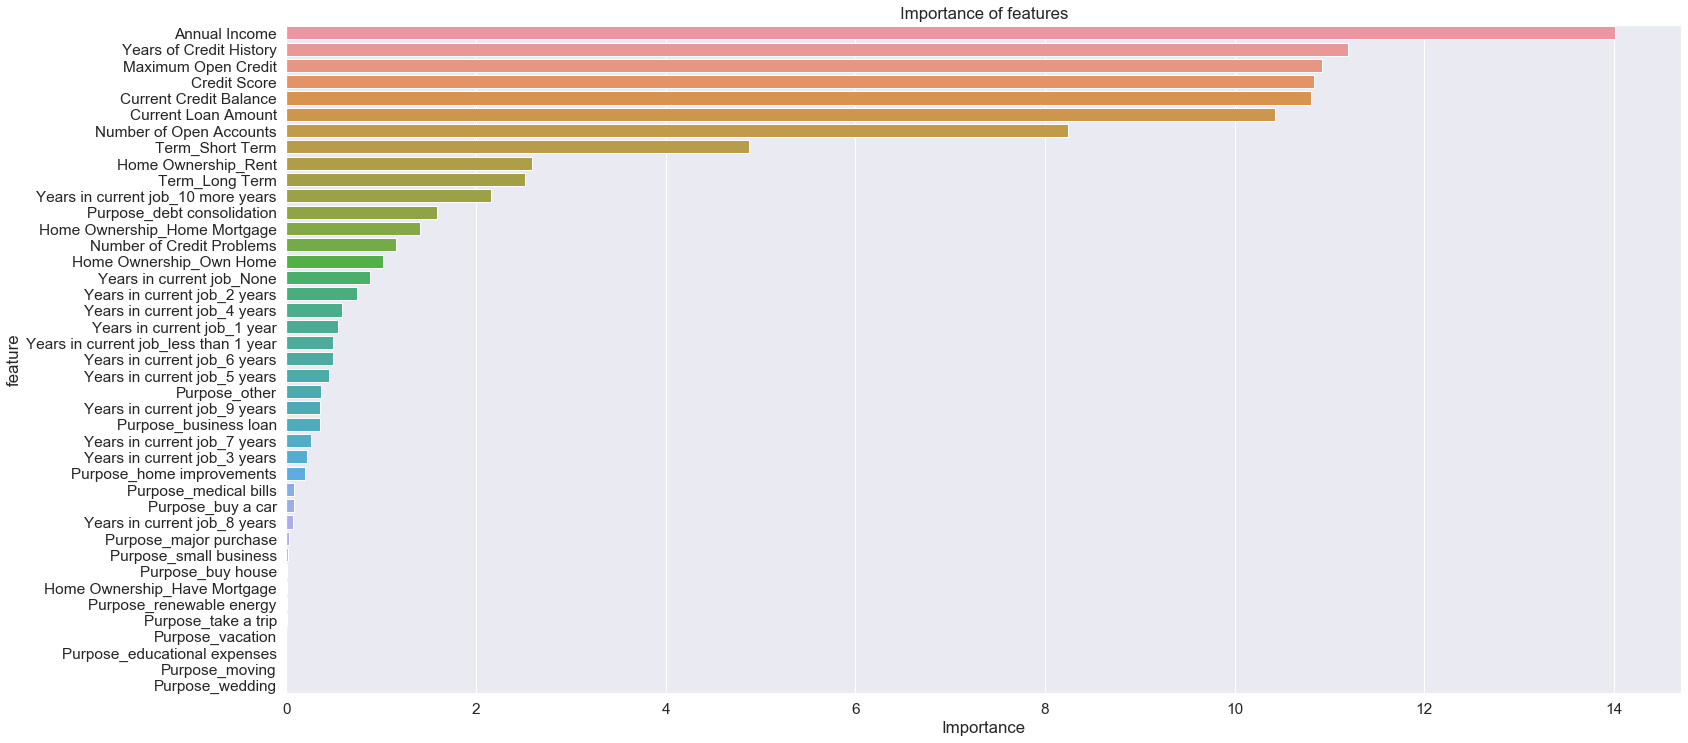

In [958]:
important_features_top = show_feature_importances(X_train.columns, final_model.feature_importances_, get_top = 15)

In [960]:
important_features_top

['Annual Income',
 'Years of Credit History',
 'Maximum Open Credit',
 'Credit Score',
 'Current Credit Balance',
 'Current Loan Amount',
 'Number of Open Accounts',
 'Term_Short Term',
 'Home Ownership_Rent',
 'Term_Long Term',
 'Years in current job_10 more years',
 'Purpose_debt consolidation',
 'Home Ownership_Home Mortgage',
 'Number of Credit Problems',
 'Home Ownership_Own Home']

In [961]:
final_model = catb.CatBoostClassifier(n_estimators = n_e, max_depth = m_d, learning_rate = l_r, l2_leaf_reg = 100,
                                      silent = True, random_state = 21)
final_model.fit(X_train[important_features_top], Y_train)

Y_train_pred = final_model.predict(X_train[important_features_top])
Y_test_pred = final_model.predict(X_test[important_features_top])
Y_test_pred_probs = final_model.predict_proba(X_test[important_features_top])

get_classification_report(Y_train, Y_train_pred, Y_test, Y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      3369
           1       0.86      0.83      0.84      3174

    accuracy                           0.85      6543
   macro avg       0.85      0.85      0.85      6543
weighted avg       0.85      0.85      0.85      6543

TEST

              precision    recall  f1-score   support

           0       0.69      0.69      0.69      1138
           1       0.67      0.67      0.67      1044

    accuracy                           0.68      2182
   macro avg       0.68      0.68      0.68      2182
weighted avg       0.68      0.68      0.68      2182

CONFUSION MATRIX

col_0           0.0  1.0
Credit Default          
0               790  348
1               347  697


In [962]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [963]:
with open('model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

## Прогнозирование на тестовом датасете

In [964]:
df_test = pd.read_csv(test_path)
df_base = df_test.copy()
df_test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [965]:
df_test.shape

(2500, 16)

In [966]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
Home Ownership                  2500 non-null object
Annual Income                   1987 non-null float64
Years in current job            2414 non-null object
Tax Liens                       2500 non-null float64
Number of Open Accounts         2500 non-null float64
Years of Credit History         2500 non-null float64
Maximum Open Credit             2500 non-null float64
Number of Credit Problems       2500 non-null float64
Months since last delinquent    1142 non-null float64
Bankruptcies                    2497 non-null float64
Purpose                         2500 non-null object
Term                            2500 non-null object
Current Loan Amount             2500 non-null float64
Current Credit Balance          2500 non-null float64
Monthly Debt                    2500 non-null float64
Credit Score                    1987 non-null float64
dtypes: float64(12), object(4)
me

Заменим пропуски

In [967]:
col_name = 'Annual Income'
val = df_test[col_name].median()
df_test[col_name] = df_test[col_name].fillna(val)

In [968]:
df_test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,1178475.0,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0


In [969]:
df_test.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
count,2.500000e+03,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,1142.000000,2497.000000,2.500000e+03,2.500000e+03,2500.000000,1987.000000
mean,1.328252e+06,0.035200,11.184400,18.325920,7.105704e+05,0.162000,34.181261,0.106928,1.215572e+07,2.963966e+05,18271.340000,1234.516860
std,8.211249e+05,0.386291,4.852774,7.254659,1.511983e+06,0.559894,22.024277,0.357189,3.226097e+07,3.783020e+05,11543.881469,1740.219442
min,1.065330e+05,0.000000,1.000000,3.900000,0.000000e+00,0.000000,0.000000,0.000000,1.542200e+04,0.000000e+00,93.000000,585.000000
25%,9.365622e+05,0.000000,8.000000,13.400000,2.785860e+05,0.000000,16.000000,0.000000,1.871265e+05,1.101145e+05,10024.750000,710.000000
50%,1.178475e+06,0.000000,10.000000,17.000000,4.786760e+05,0.000000,30.000000,0.000000,3.223660e+05,2.073850e+05,16642.500000,731.000000
75%,1.488726e+06,0.000000,14.000000,22.100000,8.025985e+05,0.000000,50.000000,0.000000,5.225825e+05,3.663485e+05,24146.000000,743.000000
max,1.497561e+07,15.000000,48.000000,53.400000,5.448439e+07,15.000000,82.000000,5.000000,1.000000e+08,6.030087e+06,93555.000000,7480.000000


Делим те 'Credit Score', которые более 5000, на 10

In [970]:
col_name = 'Credit Score'
threshold = 5000
df_test.loc[df_test[col_name] > threshold, col_name] = df_test[df_test[col_name] > threshold][col_name] * 0.1

In [971]:
df_test.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
count,2.500000e+03,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,1142.000000,2497.000000,2.500000e+03,2.500000e+03,2500.000000,1987.000000
mean,1.328252e+06,0.035200,11.184400,18.325920,7.105704e+05,0.162000,34.181261,0.106928,1.215572e+07,2.963966e+05,18271.340000,719.542023
std,8.211249e+05,0.386291,4.852774,7.254659,1.511983e+06,0.559894,22.024277,0.357189,3.226097e+07,3.783020e+05,11543.881469,27.724287
min,1.065330e+05,0.000000,1.000000,3.900000,0.000000e+00,0.000000,0.000000,0.000000,1.542200e+04,0.000000e+00,93.000000,585.000000
25%,9.365622e+05,0.000000,8.000000,13.400000,2.785860e+05,0.000000,16.000000,0.000000,1.871265e+05,1.101145e+05,10024.750000,706.000000
50%,1.178475e+06,0.000000,10.000000,17.000000,4.786760e+05,0.000000,30.000000,0.000000,3.223660e+05,2.073850e+05,16642.500000,727.000000
75%,1.488726e+06,0.000000,14.000000,22.100000,8.025985e+05,0.000000,50.000000,0.000000,5.225825e+05,3.663485e+05,24146.000000,740.000000
max,1.497561e+07,15.000000,48.000000,53.400000,5.448439e+07,15.000000,82.000000,5.000000,1.000000e+08,6.030087e+06,93555.000000,751.000000


In [972]:
val = df_test[col_name].median()
df_test[col_name] = df_test[col_name].fillna(val)

In [973]:
df_test.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
count,2.500000e+03,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,1142.000000,2497.000000,2.500000e+03,2.500000e+03,2500.000000,2500.000000
mean,1.328252e+06,0.035200,11.184400,18.325920,7.105704e+05,0.162000,34.181261,0.106928,1.215572e+07,2.963966e+05,18271.340000,721.072400
std,8.211249e+05,0.386291,4.852774,7.254659,1.511983e+06,0.559894,22.024277,0.357189,3.226097e+07,3.783020e+05,11543.881469,24.898272
min,1.065330e+05,0.000000,1.000000,3.900000,0.000000e+00,0.000000,0.000000,0.000000,1.542200e+04,0.000000e+00,93.000000,585.000000
25%,9.365622e+05,0.000000,8.000000,13.400000,2.785860e+05,0.000000,16.000000,0.000000,1.871265e+05,1.101145e+05,10024.750000,714.000000
50%,1.178475e+06,0.000000,10.000000,17.000000,4.786760e+05,0.000000,30.000000,0.000000,3.223660e+05,2.073850e+05,16642.500000,727.000000
75%,1.488726e+06,0.000000,14.000000,22.100000,8.025985e+05,0.000000,50.000000,0.000000,5.225825e+05,3.663485e+05,24146.000000,738.000000
max,1.497561e+07,15.000000,48.000000,53.400000,5.448439e+07,15.000000,82.000000,5.000000,1.000000e+08,6.030087e+06,93555.000000,751.000000


In [974]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
Home Ownership                  2500 non-null object
Annual Income                   2500 non-null float64
Years in current job            2414 non-null object
Tax Liens                       2500 non-null float64
Number of Open Accounts         2500 non-null float64
Years of Credit History         2500 non-null float64
Maximum Open Credit             2500 non-null float64
Number of Credit Problems       2500 non-null float64
Months since last delinquent    1142 non-null float64
Bankruptcies                    2497 non-null float64
Purpose                         2500 non-null object
Term                            2500 non-null object
Current Loan Amount             2500 non-null float64
Current Credit Balance          2500 non-null float64
Monthly Debt                    2500 non-null float64
Credit Score                    2500 non-null float64
dtypes: float64(12), object(4)
me

In [975]:
col_name = 'Years in current job'
df_test[col_name].fillna('None', inplace = True)

In [976]:
df_test.loc[(df_test[col_name] == '10+ years'), col_name] = '10 more years'
df_test.loc[(df_test[col_name] == '< 1 year'), col_name] = 'less than 1 year'

In [977]:
for c in df_test.select_dtypes(include = 'object').columns:
    df_test = pd.concat([df_test, pd.get_dummies(df_test[c], prefix = c)], axis=1)

In [978]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 48 columns):
Home Ownership                           2500 non-null object
Annual Income                            2500 non-null float64
Years in current job                     2500 non-null object
Tax Liens                                2500 non-null float64
Number of Open Accounts                  2500 non-null float64
Years of Credit History                  2500 non-null float64
Maximum Open Credit                      2500 non-null float64
Number of Credit Problems                2500 non-null float64
Months since last delinquent             1142 non-null float64
Bankruptcies                             2497 non-null float64
Purpose                                  2500 non-null object
Term                                     2500 non-null object
Current Loan Amount                      2500 non-null float64
Current Credit Balance                   2500 non-null float64
Monthly Debt   

In [979]:
try:
    BASE_FEATURE_NAMES = list(set(df_base.columns.tolist()) - set(cols_for_drop))
except:
    print('Columns were droped')
try:
    NEW_FEATURE_NAMES = df_test.columns.drop(BASE_FEATURE_NAMES).tolist()
except:
    print('Columns were droped')
FEATURE_NAMES_SELECTED = NUMERIC_FEATURE_NAMES + NEW_FEATURE_NAMES

In [980]:
BASE_FEATURE_NAMES

['Credit Score',
 'Number of Open Accounts',
 'Current Credit Balance',
 'Term',
 'Maximum Open Credit',
 'Current Loan Amount',
 'Number of Credit Problems',
 'Purpose',
 'Years of Credit History',
 'Years in current job',
 'Annual Income',
 'Home Ownership']

In [981]:
NUMERIC_FEATURE_NAMES

['Annual Income',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Current Loan Amount',
 'Current Credit Balance',
 'Credit Score']

In [982]:
NEW_FEATURE_NAMES

['Tax Liens',
 'Months since last delinquent',
 'Bankruptcies',
 'Monthly Debt',
 'Home Ownership_Have Mortgage',
 'Home Ownership_Home Mortgage',
 'Home Ownership_Own Home',
 'Home Ownership_Rent',
 'Years in current job_1 year',
 'Years in current job_10 more years',
 'Years in current job_2 years',
 'Years in current job_3 years',
 'Years in current job_4 years',
 'Years in current job_5 years',
 'Years in current job_6 years',
 'Years in current job_7 years',
 'Years in current job_8 years',
 'Years in current job_9 years',
 'Years in current job_None',
 'Years in current job_less than 1 year',
 'Purpose_business loan',
 'Purpose_buy a car',
 'Purpose_buy house',
 'Purpose_debt consolidation',
 'Purpose_educational expenses',
 'Purpose_home improvements',
 'Purpose_major purchase',
 'Purpose_medical bills',
 'Purpose_moving',
 'Purpose_other',
 'Purpose_small business',
 'Purpose_take a trip',
 'Purpose_vacation',
 'Purpose_wedding',
 'Term_Long Term',
 'Term_Short Term']

In [983]:
df_test[NUMERIC_FEATURE_NAMES] = scaler.fit_transform(df_test[NUMERIC_FEATURE_NAMES])

In [984]:
df = df_test.copy()

In [985]:
FEATURE_NAMES_SELECTED

['Annual Income',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Current Loan Amount',
 'Current Credit Balance',
 'Credit Score',
 'Tax Liens',
 'Months since last delinquent',
 'Bankruptcies',
 'Monthly Debt',
 'Home Ownership_Have Mortgage',
 'Home Ownership_Home Mortgage',
 'Home Ownership_Own Home',
 'Home Ownership_Rent',
 'Years in current job_1 year',
 'Years in current job_10 more years',
 'Years in current job_2 years',
 'Years in current job_3 years',
 'Years in current job_4 years',
 'Years in current job_5 years',
 'Years in current job_6 years',
 'Years in current job_7 years',
 'Years in current job_8 years',
 'Years in current job_9 years',
 'Years in current job_None',
 'Years in current job_less than 1 year',
 'Purpose_business loan',
 'Purpose_buy a car',
 'Purpose_buy house',
 'Purpose_debt consolidation',
 'Purpose_educational expenses',
 'Purpose_home improvements',
 'Purpose_major purchase',
 'Purpo

In [986]:
X = df[FEATURE_NAMES_SELECTED]

In [987]:
Y_pred = final_model.predict(X)

In [988]:
Y_pred

array([0., 1., 0., ..., 1., 1., 0.])

In [989]:
type(Y_pred)

numpy.ndarray

In [990]:
np.savetxt('ANovikov_predictions.csv', Y_pred, delimiter = ',')

Конец.